In [72]:
import pandas as pd
import numpy as np
from google.colab import drive
from numpy import nan as NA
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Import

In [73]:
import chardet
import glob



def isItUnicode(filename):
    with open(filename, 'rb') as f:
        encodingInfo = chardet.detect(f.read())
        if "UTF" not in encodingInfo['encoding']:
            print("This isn't Unicode! It's", encodingInfo['encoding'])
        else:
            print("Yep, it's Unicode.")

In [74]:
isItUnicode('/content/drive/MyDrive/Notebooks/bank-marketing.csv')

This isn't Unicode! It's ascii


In [75]:
df = pd.read_csv('/content/drive/MyDrive/Notebooks/bank-marketing.csv',na_values=['unknown'])

# Handling missing values

In [ ]:
pd.set_option('display.max_columns', None)

1. **Age**: Age of the customer.
2. **Age Group**: What age group the customer falls into.
3. **Eligibility**: Whether the customer is eligible for the talk or not.
4. **Job**: The customer's occupation.
5. **Salary**: Salary of the customer.
6. **Marital Status**: Whether the customer is married or not.
7. **Education Level**: Level of education completed.
8. **Marital-Education Status**: Marital status and level of education.
9. **Targeted**: Whether the customer is being targeted or not.
10. **Default Status**: If the customer is on the default list or not.
11. **Account Balance**: Remaining balance in their accounts.
12. **Housing Status**: Information about housing.
13. **Loan Status**: Whether the customer has a prior loan or not.
14. **Contact Source**: Source of this information.
15. **Day**: Today's date.
16. **Month**: Current month.
17. **Duration**: Number of days.
18. **Campaign**: Marketing campaign details.
19. **Pdays**: Number of days that have passed since the client was last contacted.
20. **Previous Response**: Previous response from the customer.
21. **POutcome**: Outcome of the previous marketing campaign.
22. **Y (Decision)**: Yes or No decision.
23. **Response**: Response from the actor.

In [ ]:
df.head()

age  age group eligible           job  salary  marital  education  \
0   58          5        Y    management  100000  married   tertiary   
1   44          4        Y    technician   60000   single  secondary   
2   33          3        Y  entrepreneur  120000  married  secondary   
3   47          4        Y   blue-collar   20000  married        NaN   
4   33          3        Y           NaN       0   single        NaN   

   marital-education targeted default  balance housing loan contact  day  \
0   married-tertiary      yes      no     2143     yes   no     NaN    5   
1   single-secondary      yes      no       29     yes   no     NaN    5   
2  married-secondary      yes      no        2     yes  yes     NaN    5   
3    married-unknown       no      no     1506     yes   no     NaN    5   
4     single-unknown       no      no        1      no   no     NaN    5   

  month  duration  campaign  pdays  previous poutcome   y  response  
0   may       261         1     -1         0      NaN  no         0  
1   may       151         1     -1         0      NaN  no         0  
2   may        76         1     -1         0      NaN  no         0  
3   may        92         1     -1         0      NaN  no         0  
4   may       198         1     -1         0      NaN  no         0

In [ ]:
df[df['y'] == 'no'].tail()

age  age group eligible           job  salary  marital  education  \
45194   59          5        Y    management  100000  married   tertiary   
45198   37          3        Y    management  100000  married   tertiary   
45199   34          3        Y   blue-collar   20000   single  secondary   
45209   57          5        Y   blue-collar   20000  married  secondary   
45210   37          3        Y  entrepreneur  120000  married  secondary   

       marital-education targeted default  balance housing loan    contact  \
45194   married-tertiary      yes      no      138     yes  yes   cellular   
45198   married-tertiary      yes      no     1428      no   no   cellular   
45199   single-secondary      yes      no     1475     yes   no   cellular   
45209  married-secondary      yes      no      668      no   no  telephone   
45210  married-secondary      yes      no     2971      no   no   cellular   

       day month  duration  campaign  pdays  previous poutcome   y  response  
45194   16   nov       162         2    187         5  failure  no         0  
45198   16   nov       333         2     -1         0      NaN  no         0  
45199   16   nov      1166         3    530        12    other  no         0  
45209   17   nov       508         4     -1         0      NaN  no         0  
45210   17   nov       361         2    188        11    other  no         0

In [ ]:
df[df['y'] == 'yes'].tail()

age  age group eligible         job  salary   marital  education  \
45204   73          7        N     retired   55000   married  secondary   
45205   25          2        Y  technician   60000    single  secondary   
45206   51          5        Y  technician   60000   married   tertiary   
45207   71          7        N     retired   55000  divorced    primary   
45208   72          7        N     retired   55000   married  secondary   

       marital-education targeted default  balance housing loan   contact  \
45204  married-secondary      yes      no     2850      no   no  cellular   
45205   single-secondary      yes      no      505      no  yes  cellular   
45206   married-tertiary      yes      no      825      no   no  cellular   
45207   divorced-primary      yes      no     1729      no   no  cellular   
45208  married-secondary      yes      no     5715      no   no  cellular   

       day month  duration  campaign  pdays  previous poutcome    y  response  
45204   17   nov       300         1     40         8  failure  yes         1  
45205   17   nov       386         2     -1         0      NaN  yes         1  
45206   17   nov       977         3     -1         0      NaN  yes         1  
45207   17   nov       456         2     -1         0      NaN  yes         1  
45208   17   nov      1127         5    184         3  success  yes         1

In [ ]:
def perc_miss(df):
  miss = df.isnull().sum().sort_values(ascending=False)
  miss = miss[miss.values != 0]
  tt_cels = np.product(df.shape)
  tt_missing = miss.sum()

  perc = round(((tt_missing/tt_cels) * 100),3)
  pr = 'Percent of miss:' + str(perc) + "%"
  _all = "In sum:" + str(tt_missing.sum())

  return pr,_all,miss

In [ ]:
perc_miss(df)

<ipython-input-10-d1e3f6df6c5b>:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  perc_miss(df)


('Percent of miss:5.013%',
 'In sum:52124',
 poutcome     36959
 contact      13020
 education     1857
 job            288
 dtype: int64)

<Axes: >

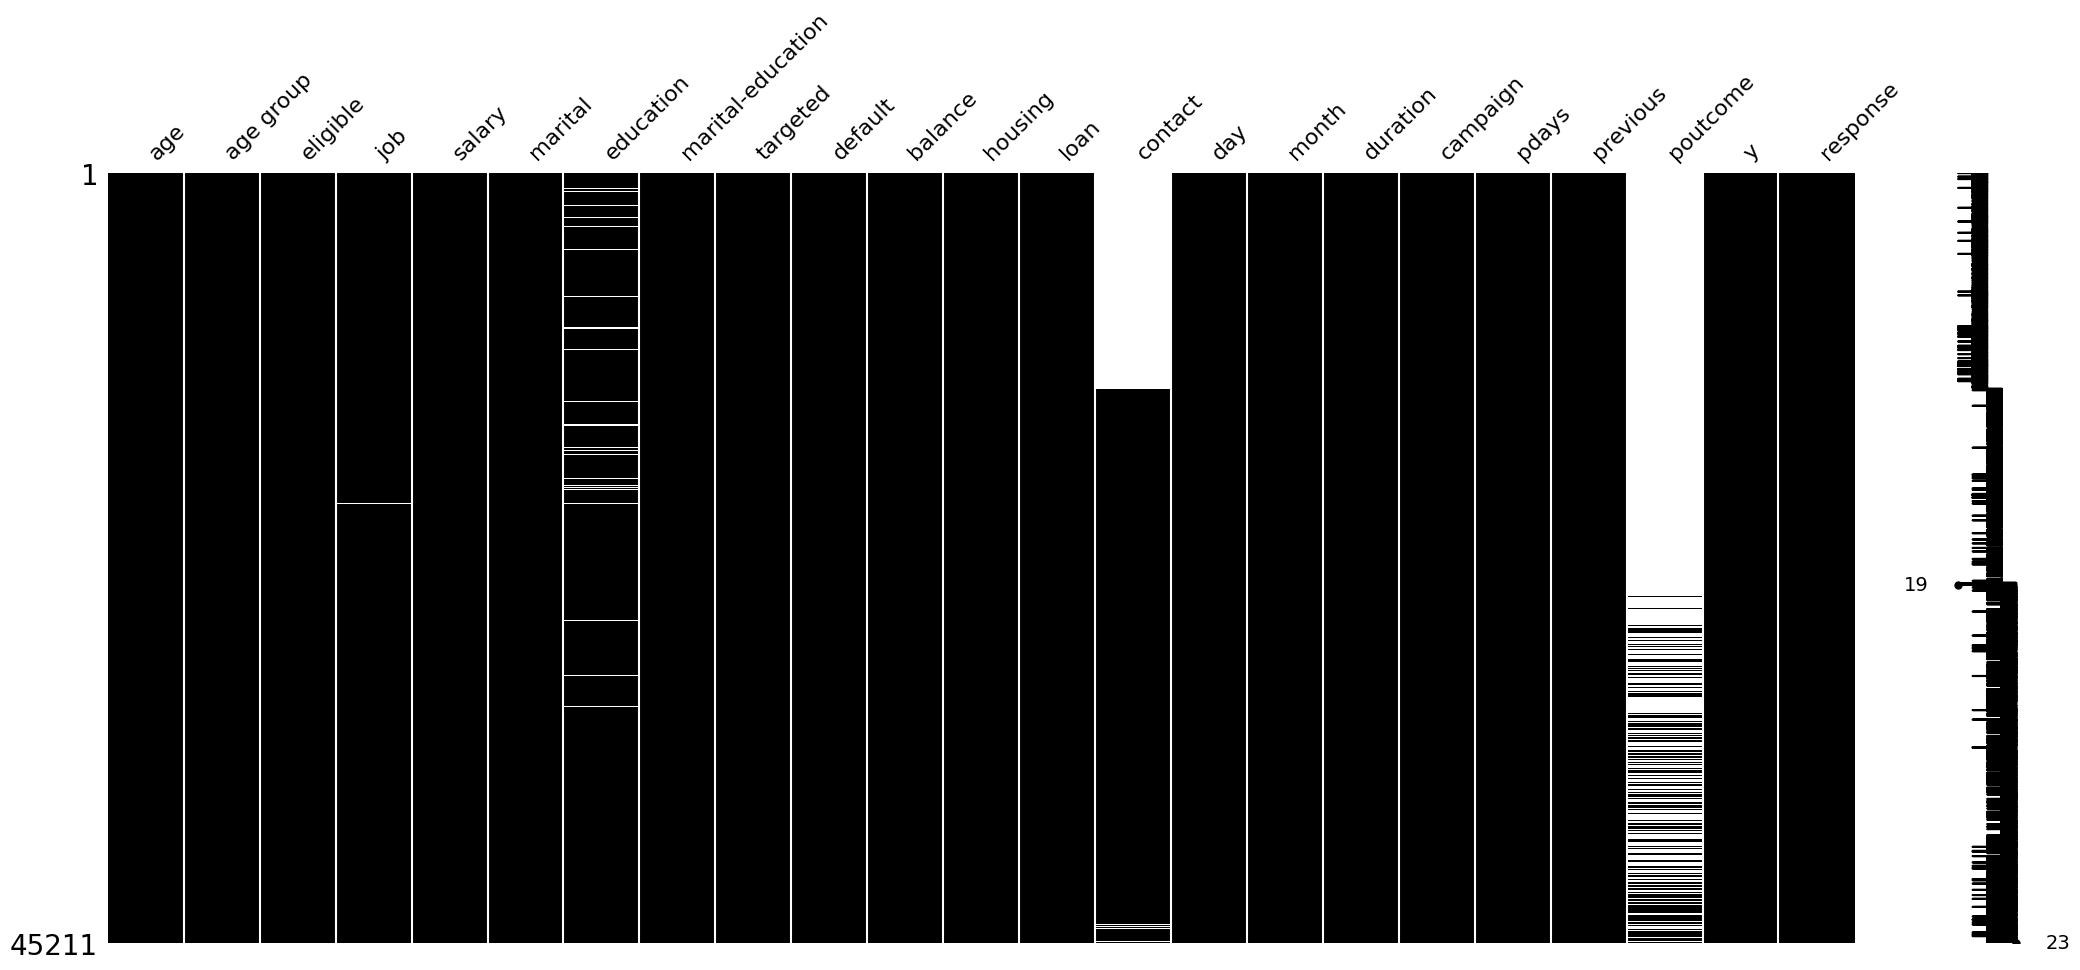

In [ ]:
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [ ]:
df.nunique().sort_values(ascending=False)

balance              7168
duration             1573
pdays                 559
age                    77
campaign               48
previous               41
day                    31
marital-education      12
month                  12
job                    11
salary                 11
age group               9
marital                 3
education               3
poutcome                3
y                       2
housing                 2
contact                 2
loan                    2
default                 2
targeted                2
eligible                2
response                2
dtype: int64

In [ ]:
for i in df.columns:
  print(i,df[i].unique())
  print('--------------')

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------
age group [5 4 3 2 6 8 7 1 9]
--------------
eligible ['Y' 'N']
--------------
job ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
--------------
salary [100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]
--------------
marital ['married' 'single' 'divorced']
--------------
education ['tertiary' 'secondary' nan 'primary']
--------------
marital-education ['married-tertiary' 'single-secondary' 'married-secondary'
 'married-unknown' 'single-unknown' 'single-tertiary' 'divorced-tertiary'
 'married-primary' 'divorced-secondary' 'single-primary'
 'divorced-primary' 'divorced-unknown']
--------------
targeted ['yes' 'no'

In [ ]:
df[(df['poutcome'] == "other")]['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  9, 11,  8, 10, 12, 13, 16])

In [ ]:
inf = df['poutcome'].value_counts()

In [ ]:
inf

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

In [ ]:
(df.shape[0] - df['poutcome'].isnull().sum() )

8252

In [ ]:
df_cp = df.copy()

In [ ]:
for i in df_cp.columns:
    if df[i].dtype == 'object':
        print(i, df[i].unique())
        print('--------------')

eligible ['Y' 'N']
--------------
job ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
--------------
marital ['married' 'single' 'divorced']
--------------
education ['tertiary' 'secondary' nan 'primary']
--------------
marital-education ['married-tertiary' 'single-secondary' 'married-secondary'
 'married-unknown' 'single-unknown' 'single-tertiary' 'divorced-tertiary'
 'married-primary' 'divorced-secondary' 'single-primary'
 'divorced-primary' 'divorced-unknown']
--------------
targeted ['yes' 'no']
--------------
default ['no' 'yes']
--------------
housing ['yes' 'no']
--------------
loan ['no' 'yes']
--------------
contact [nan 'cellular' 'telephone']
--------------
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------
poutcome [nan 'failure' 'other' 'success']
--------------
y ['no' 'yes']
--------------


In [ ]:
hot_col = ['eligible','job','targeted','default','housing','loan','contact','month','marital','marital-education']
drp = ['y']

#df_cp.drop(drp,axis=1,inplace=True)
hot = pd.get_dummies(df_cp[hot_col])
hot = hot.astype('float64')
df_cp = df_cp.drop(hot_col,axis=1)
df_cp = df_cp.join(hot)

In [ ]:
education_order = {'unknown':0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df_cp['education'] = df_cp['education'].map(education_order)

In [ ]:
from sklearn.preprocessing import LabelEncoder


lbl_col = ['education','poutcome']
lbl_encd = LabelEncoder()

for c in lbl_col:
    df_cp[c] = lbl_encd.fit_transform(df[c])

In [ ]:
df.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'response'],
      dtype='object')

In [ ]:
drp = ['y','poutcome']

df.drop(drp,axis = 1,inplace=True)

In [ ]:
df.dropna(subset=['job'],inplace=True)

Filling in missing values by the forecasting method

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

def fill_missing_prdc_classif(df, target_column, feat_col_hot=[], feat_col_label=[], feat_col_nonenc=[]):

    feature_columns = feat_col_label + feat_col_nonenc


    if feat_col_hot:
        df_encoded = pd.get_dummies(df[feat_col_hot], drop_first=True)
        df = pd.concat([df, df_encoded], axis=1)
        feature_columns += list(df_encoded.columns)  # Add encoded columns to feature_columns


    train_data = df.dropna(subset=[target_column])
    predict_data = df[df[target_column].isnull()]


    le_dict = {}
    for col in feat_col_label:
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])
        predict_data[col] = le.transform(predict_data[col].fillna('missing'))  #
        le_dict[col] = le


    X_train_full = train_data[feature_columns]
    y_train_full = train_data[target_column]

    if df[target_column].dtype == 'object':
        le_target = LabelEncoder()
        y_train_full = le_target.fit_transform(y_train_full)


    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)


    y_pred = model.predict(X_val)


    accuracy = accuracy_score(y_val, y_pred)
    print(f"Model accuracy: {accuracy:.2f}")


    if not predict_data.empty:
        X_predict = predict_data[feature_columns]
        predicted_values = model.predict(X_predict)


        if df[target_column].dtype == 'object':
            predicted_values = le_target.inverse_transform(predicted_values)

        df.loc[df[target_column].isnull(), target_column] = predicted_values

    return df


In [ ]:
df_tst = fill_missing_prdc_classif(df, target_column ='education',feat_col_hot=['marital','job','targeted','marital-education'],feat_col_nonenc = ['salary'])

Model accuracy: 1.00


In [ ]:
df['education'] = df_tst['education']

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df['contact'] = df['contact'].fillna('unknown')

<ipython-input-34-c103a40f07c2>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-34-c103a40f07c2>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-34-c103a40f07c2>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-34-c103a40f07c2>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-34-c103a40f07c2>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[

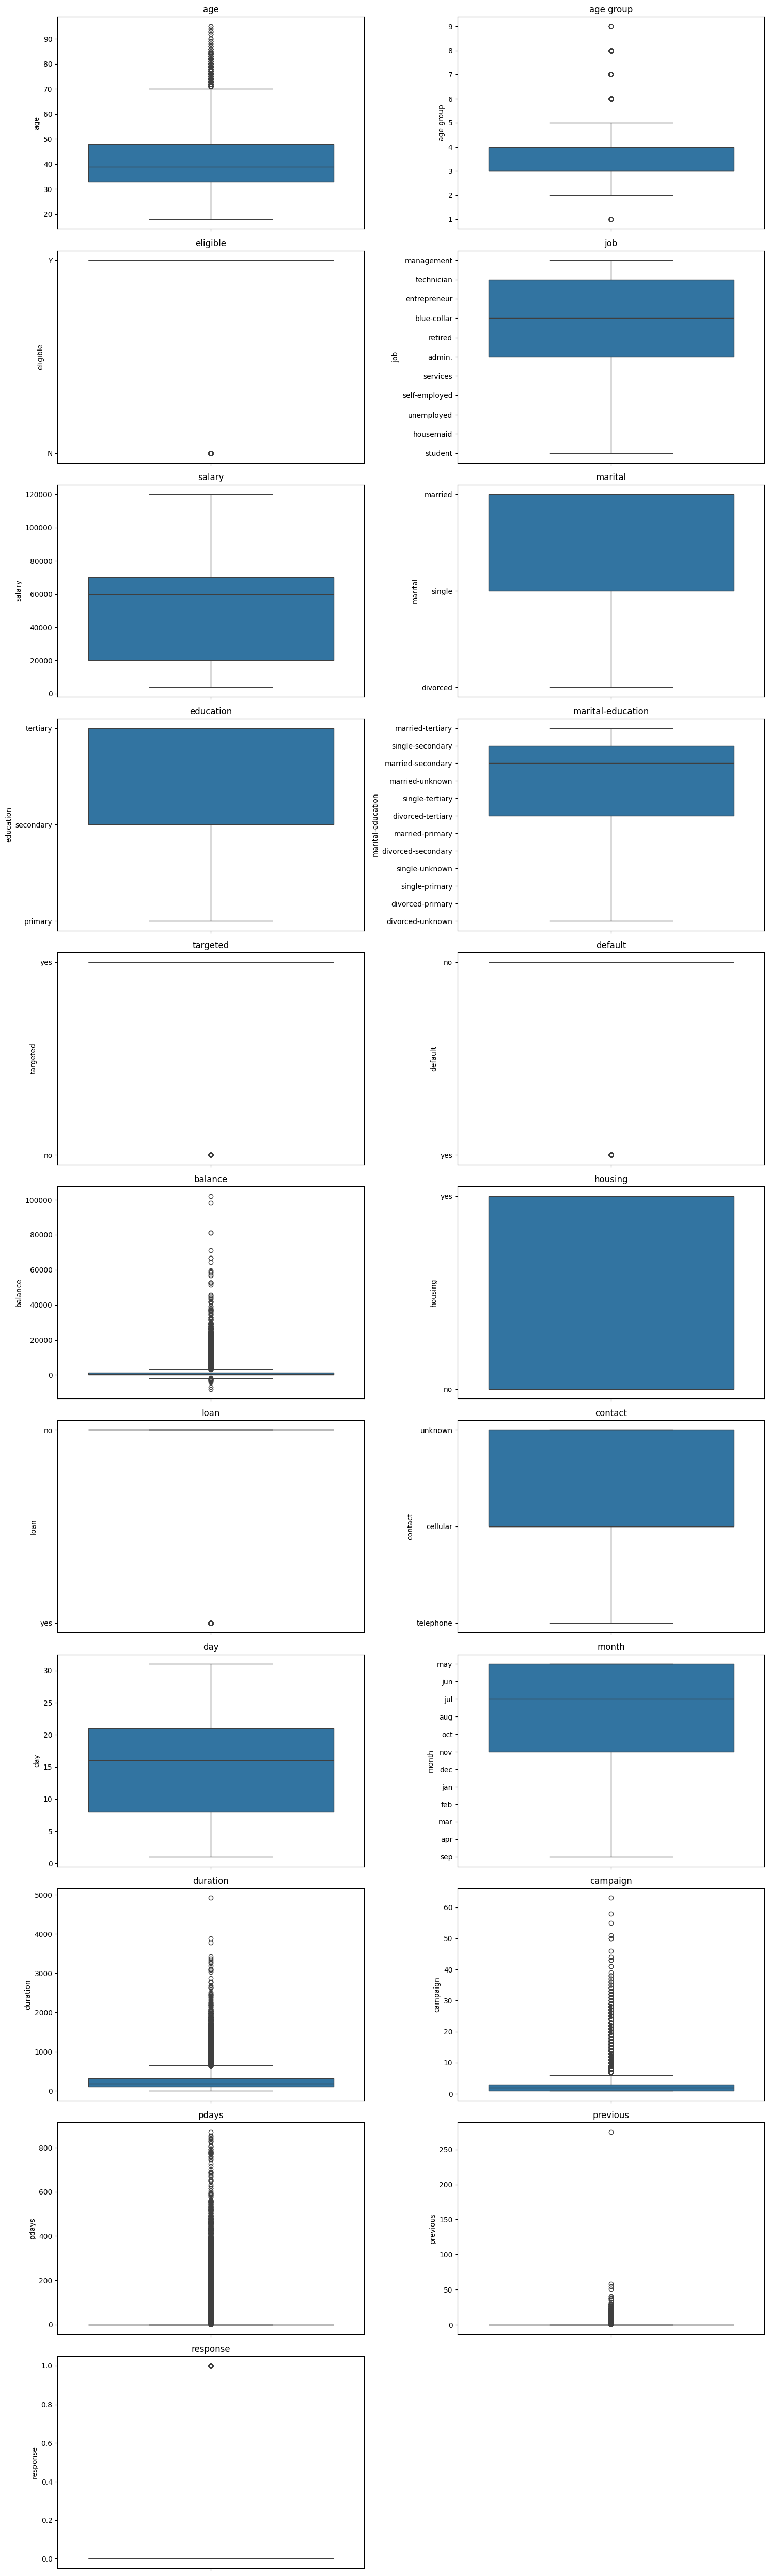

In [ ]:

col = list(df.columns)

n_cols = 2
n_rows = (len(col) + n_cols - 1) // n_cols  # Заокруглюємо в більшу сторону

# Створюємо достатню кількість підзаголовків
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 50))

# Заповнюємо всі пусті підзаголовки (якщо є)
for ax in axes.flatten()[len(col):]:
    ax.remove()

# Приводимо список осей до одновимірного масиву для легкої ітерації
axes_flat = axes.flatten()

for i, column_name in enumerate(col):
    # Виводимо дані на i-й підзаголовок
    sns.boxplot(df[column_name], ax=axes_flat[i])
    axes_flat[i].set_title(column_name)  # Встановлюємо заголовок
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей

# Коригуємо розташування для запобігання перекриття
plt.tight_layout()



# EDA

In [ ]:
df.describe().T

count          mean           std     min      25%      50%  \
age        44923.0     40.893529     10.604399    18.0     33.0     39.0   
age group  44923.0      3.641898      1.082010     1.0      3.0      3.0   
salary     44923.0  57371.635910  31861.037978  4000.0  20000.0  60000.0   
balance    44923.0   1359.643011   3045.091520 -8019.0     72.0    447.0   
day        44923.0     15.813882      8.320040     1.0      8.0     16.0   
duration   44923.0    258.294838    257.713770     0.0    103.0    180.0   
campaign   44923.0      2.760345      3.092838     1.0      1.0      2.0   
pdays      44923.0     40.321016    100.255146    -1.0     -1.0     -1.0   
previous   44923.0      0.581996      2.309077     0.0      0.0      0.0   
response   44923.0      0.116978      0.321398     0.0      0.0      0.0   

               75%       max  
age           48.0      95.0  
age group      4.0       9.0  
salary     70000.0  120000.0  
balance     1421.0  102127.0  
day           21.0      31.0  
duration     319.0    4918.0  
campaign       3.0      63.0  
pdays         -1.0     871.0  
previous       0.0     275.0  
response       0.0       1.0

In [ ]:
ct = df.groupby('age group')['age group'].value_counts()

In [ ]:
grp_counts = list(ct.values)

In [ ]:
grp_unique = list(ct.index.get_level_values(0).unique())

In [ ]:
grp_unique = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']


## Chart of the number of each age group

<BarContainer object of 9 artists>

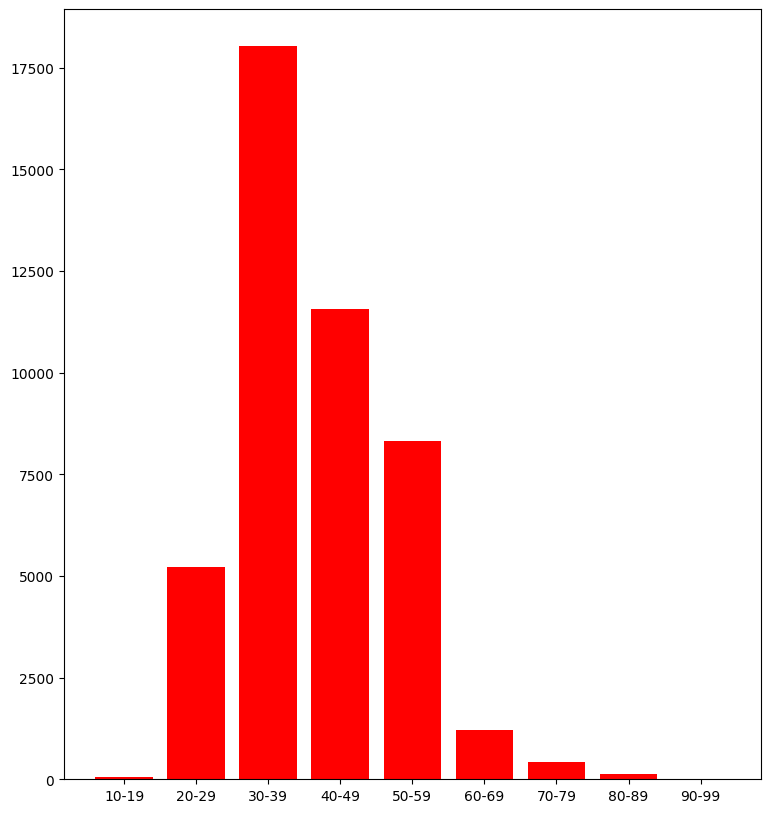

In [ ]:
fig,ax = plt.subplots(figsize=(9,10))

ax.bar(grp_unique,grp_counts,color='red')

<BarContainer object of 3 artists>

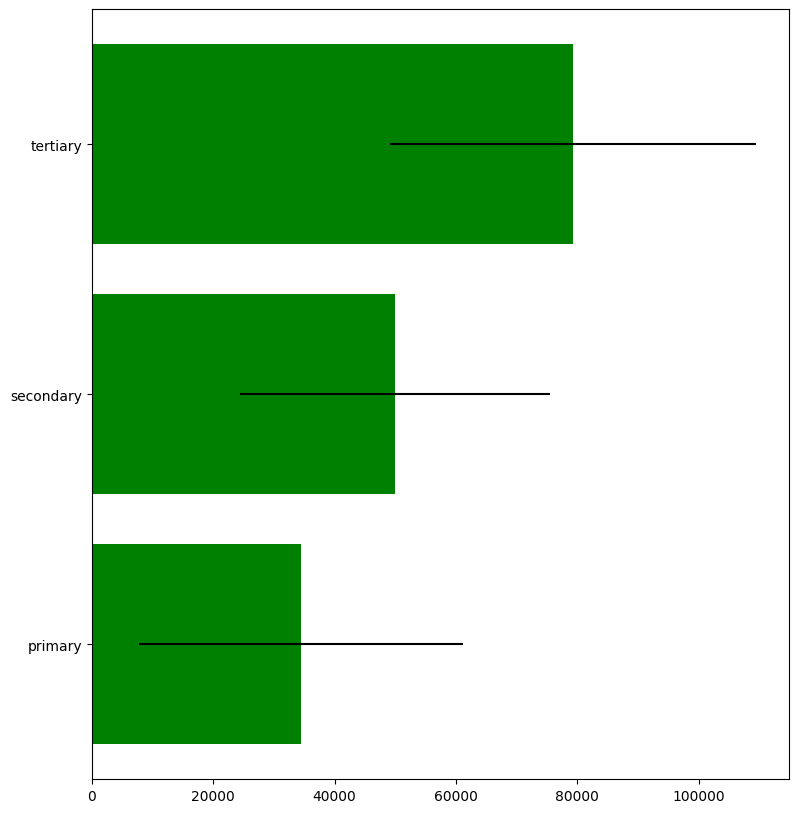

In [ ]:
fig,ax = plt.subplots(figsize=(9,10))

ed_grp = df.groupby('education')['salary'].mean()
yerr_grp = df.groupby('education')['salary'].std()




mean_sal = list(ed_grp.values)
idx_edu = list(ed_grp.index)
yerr_lst = list(yerr_grp.values)


ax.barh(idx_edu,mean_sal,color='green',xerr = yerr_lst)


<BarContainer object of 11 artists>

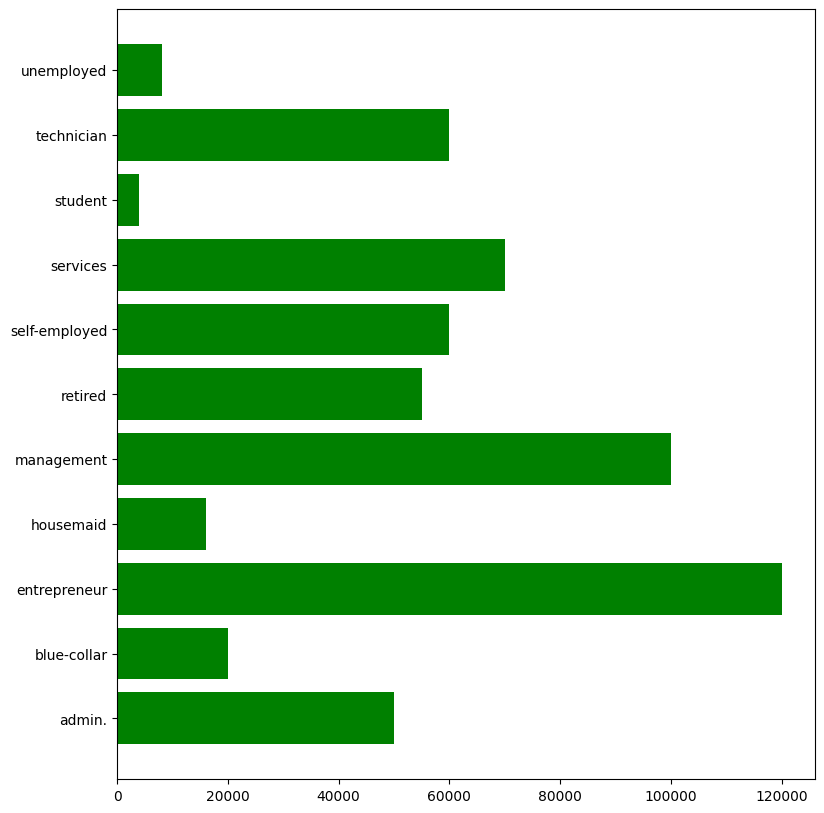

In [ ]:
fig,ax = plt.subplots(figsize=(9,10))

job_grp = df.groupby('job')['salary'].mean()
yerr_grp_job = df.groupby('job')['salary'].std()




mean_sal_job = list(job_grp.values)
idx_job = list(job_grp.index)


ax.barh(idx_job,mean_sal_job,color='green')


In [ ]:
def grp_depend(df,x,y,type,std_y_or_no='n',size=(12,10),color='red'):

  fig,ax = plt.subplots(figsize=size)

  if type == 'mean':
    d1 = df.groupby(x)[y].mean()
  elif  type == 'max':
    d1 = df.groupby(x)[y].max()
  elif  type == 'min':
     d1 = df.groupby(x)[y].max()
  elif  type == 'count':
     d1 = df.groupby(x)[y].count()


  d1_val = list(d1.values)
  idx_d1 = list(d1.index)

  if std_y_or_no == 'y':
      std1 = df.groupby(x)[y].std()
      ax.bar(idx_d1,d1_val,color=color,yerr=std1)
  else:
      ax.barh(idx_d1,d1_val,color=color)

  plt.xticks(rotation=45)


<ipython-input-44-dcc9a6eb2d91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='salary',data=df,palette='inferno')


<Axes: xlabel='age', ylabel='salary'>

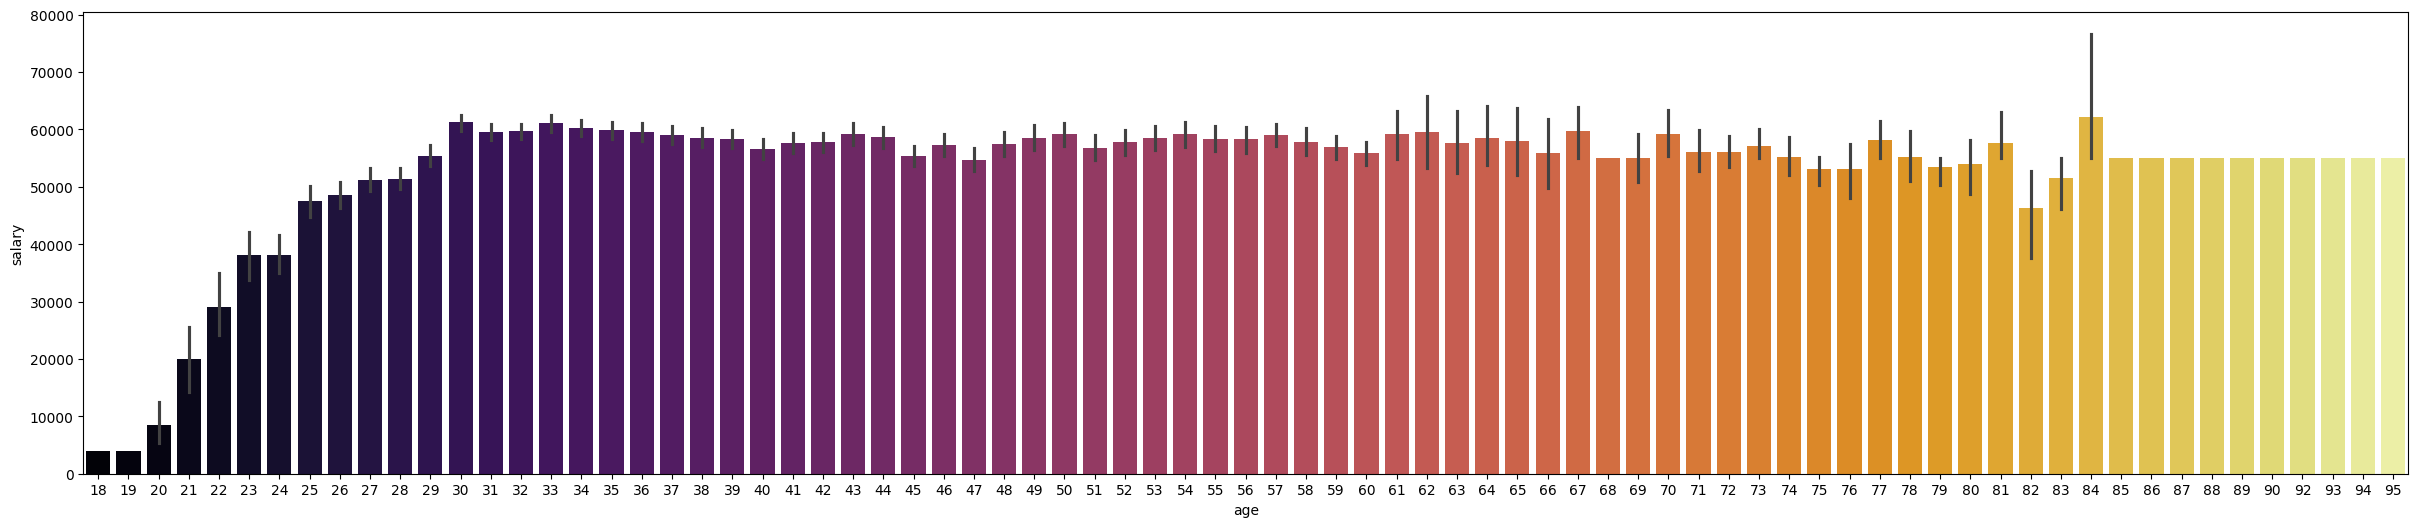

In [ ]:
a=plt.figure(figsize=(30,6))
sns.barplot(x='age',y='salary',data=df,palette='inferno')

([<matplotlib.patches.Wedge at 0x7c0ed1c50460>,
 [Text(1.282386440381698, 1.0382605730379817, 'blue-collar'),
  Text(-0.7203678770831912, 1.4844426973334661, 'management'),
  Text(-1.645519764772753, -0.12151009728505713, 'technician'),
  Text(-0.9373506453162898, -1.3578931356057204, 'admin.'),
  Text(0.07906898958624728, -1.6481043944137186, 'services'),
  Text(0.7863678672233926, -1.4505604356242912, 'retired'),
  Text(1.1433045576451295, -1.189686802678703, 'self-employed'),
  Text(1.3702598496393605, -0.9191778633465438, 'entrepreneur'),
  Text(1.5224677789078351, -0.6360753588903155, 'unemployed'),
  Text(1.6109795931966342, -0.3567138212965786, 'housemaid'),
  Text(1.6464513272729229, -0.10815741731953266, 'student')],
 [Text(0.6994835129354715, 0.5663239489298081, '21.7%'),
  Text(-0.3929279329544679, 0.809696016727345, '21.1%'),
  Text(-0.8975562353305924, -0.06627823488275843, '16.9%'),
  Text(-0.5112821701725216, -0.7406689830576656, '11.5%'),
  Text(0.043128539774316695, -0

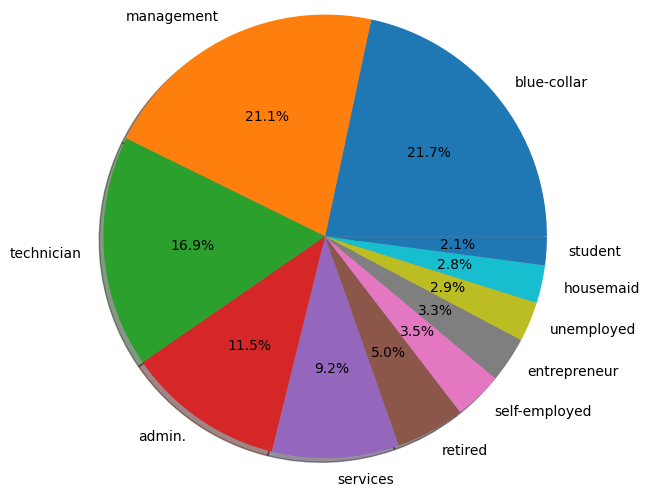

In [ ]:
inf = df['job'].value_counts()

plt.pie(x=inf.values,labels=inf.index,autopct='%1.1f%%', shadow=True,radius=1.5)

In [ ]:
from scipy.stats import norm

def all_hist(df):
    df_col = df.columns
    df_col = [i for i in df_col if df[i].dtype in ['int64', 'float64']]

    for i, col in enumerate(df_col):
        plt.figure(i)
        data = df[col]
        data.hist(bins=28, density=True, alpha=0.6, color='g')

        # Обчислюємо параметри для нормального розподілу
        mu, std = norm.fit(data)

        # Генеруємо значення для нормального розподілу
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)

        # Малюємо криву нормального розподілу
        plt.plot(x, p, 'k', linewidth=2)

        title = f"{col}, mu = {mu:.2f},  std = {std:.2f}"
        plt.title(title)

        plt.axvline(mu, color='k', linestyle='dashed', linewidth=1)


        plt.show()


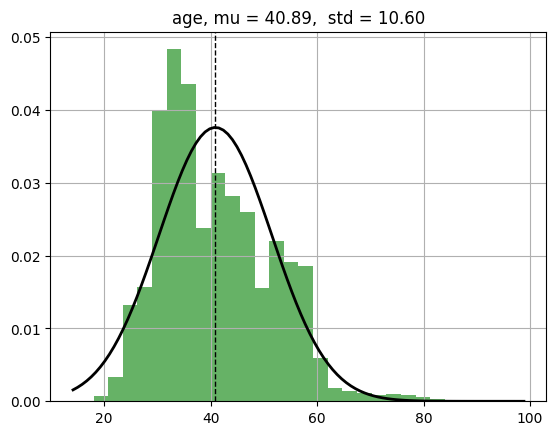

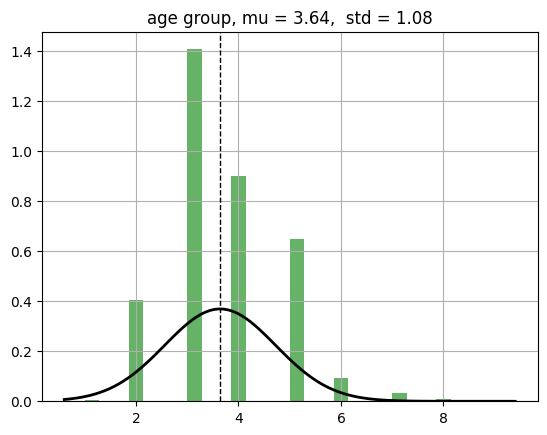

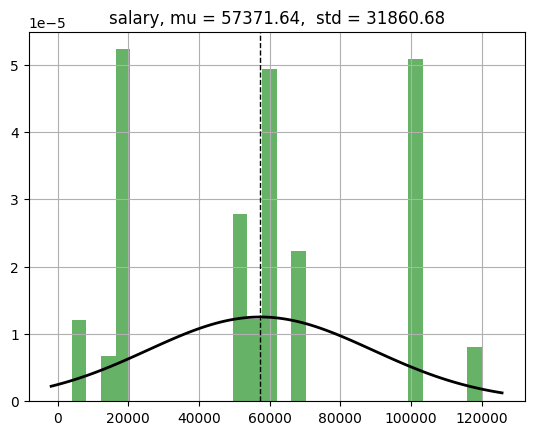

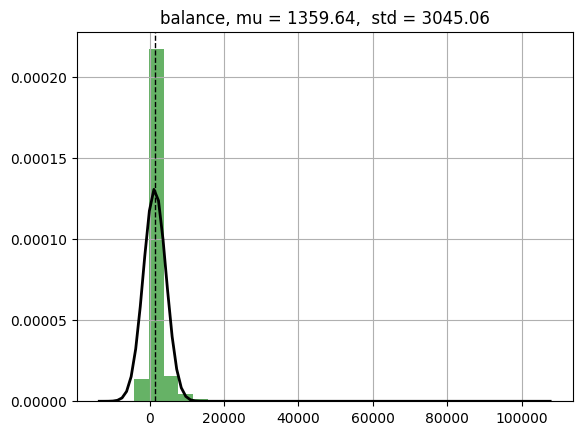

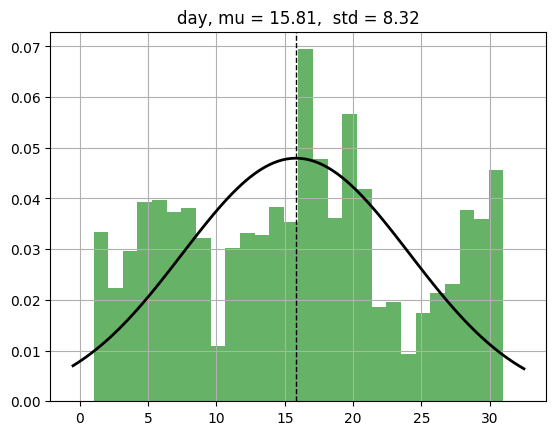

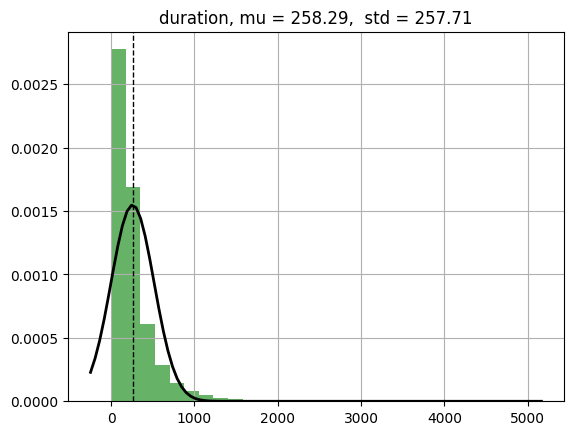

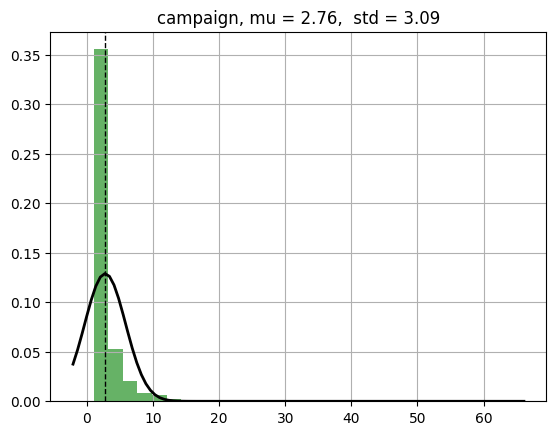

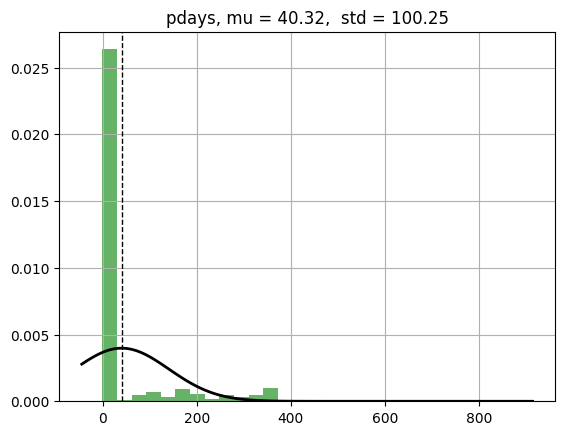

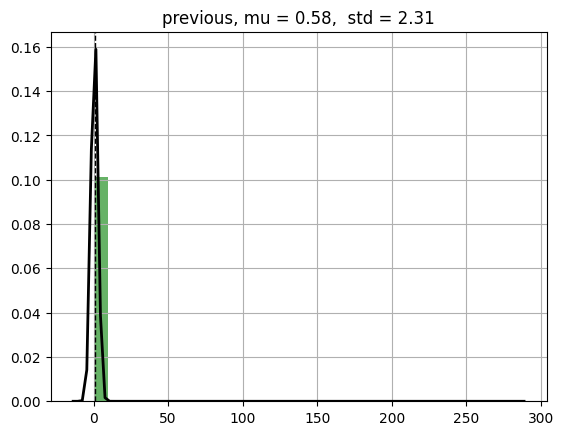

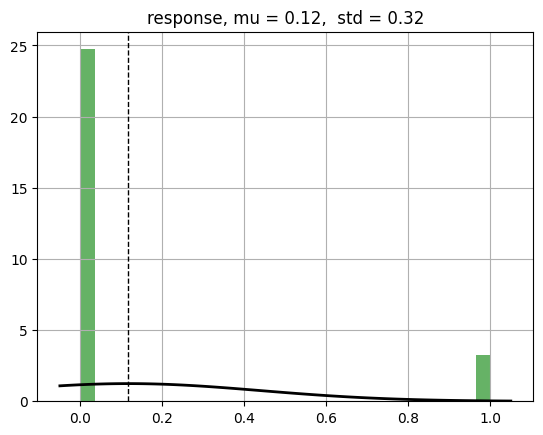

In [ ]:
all_hist(df)

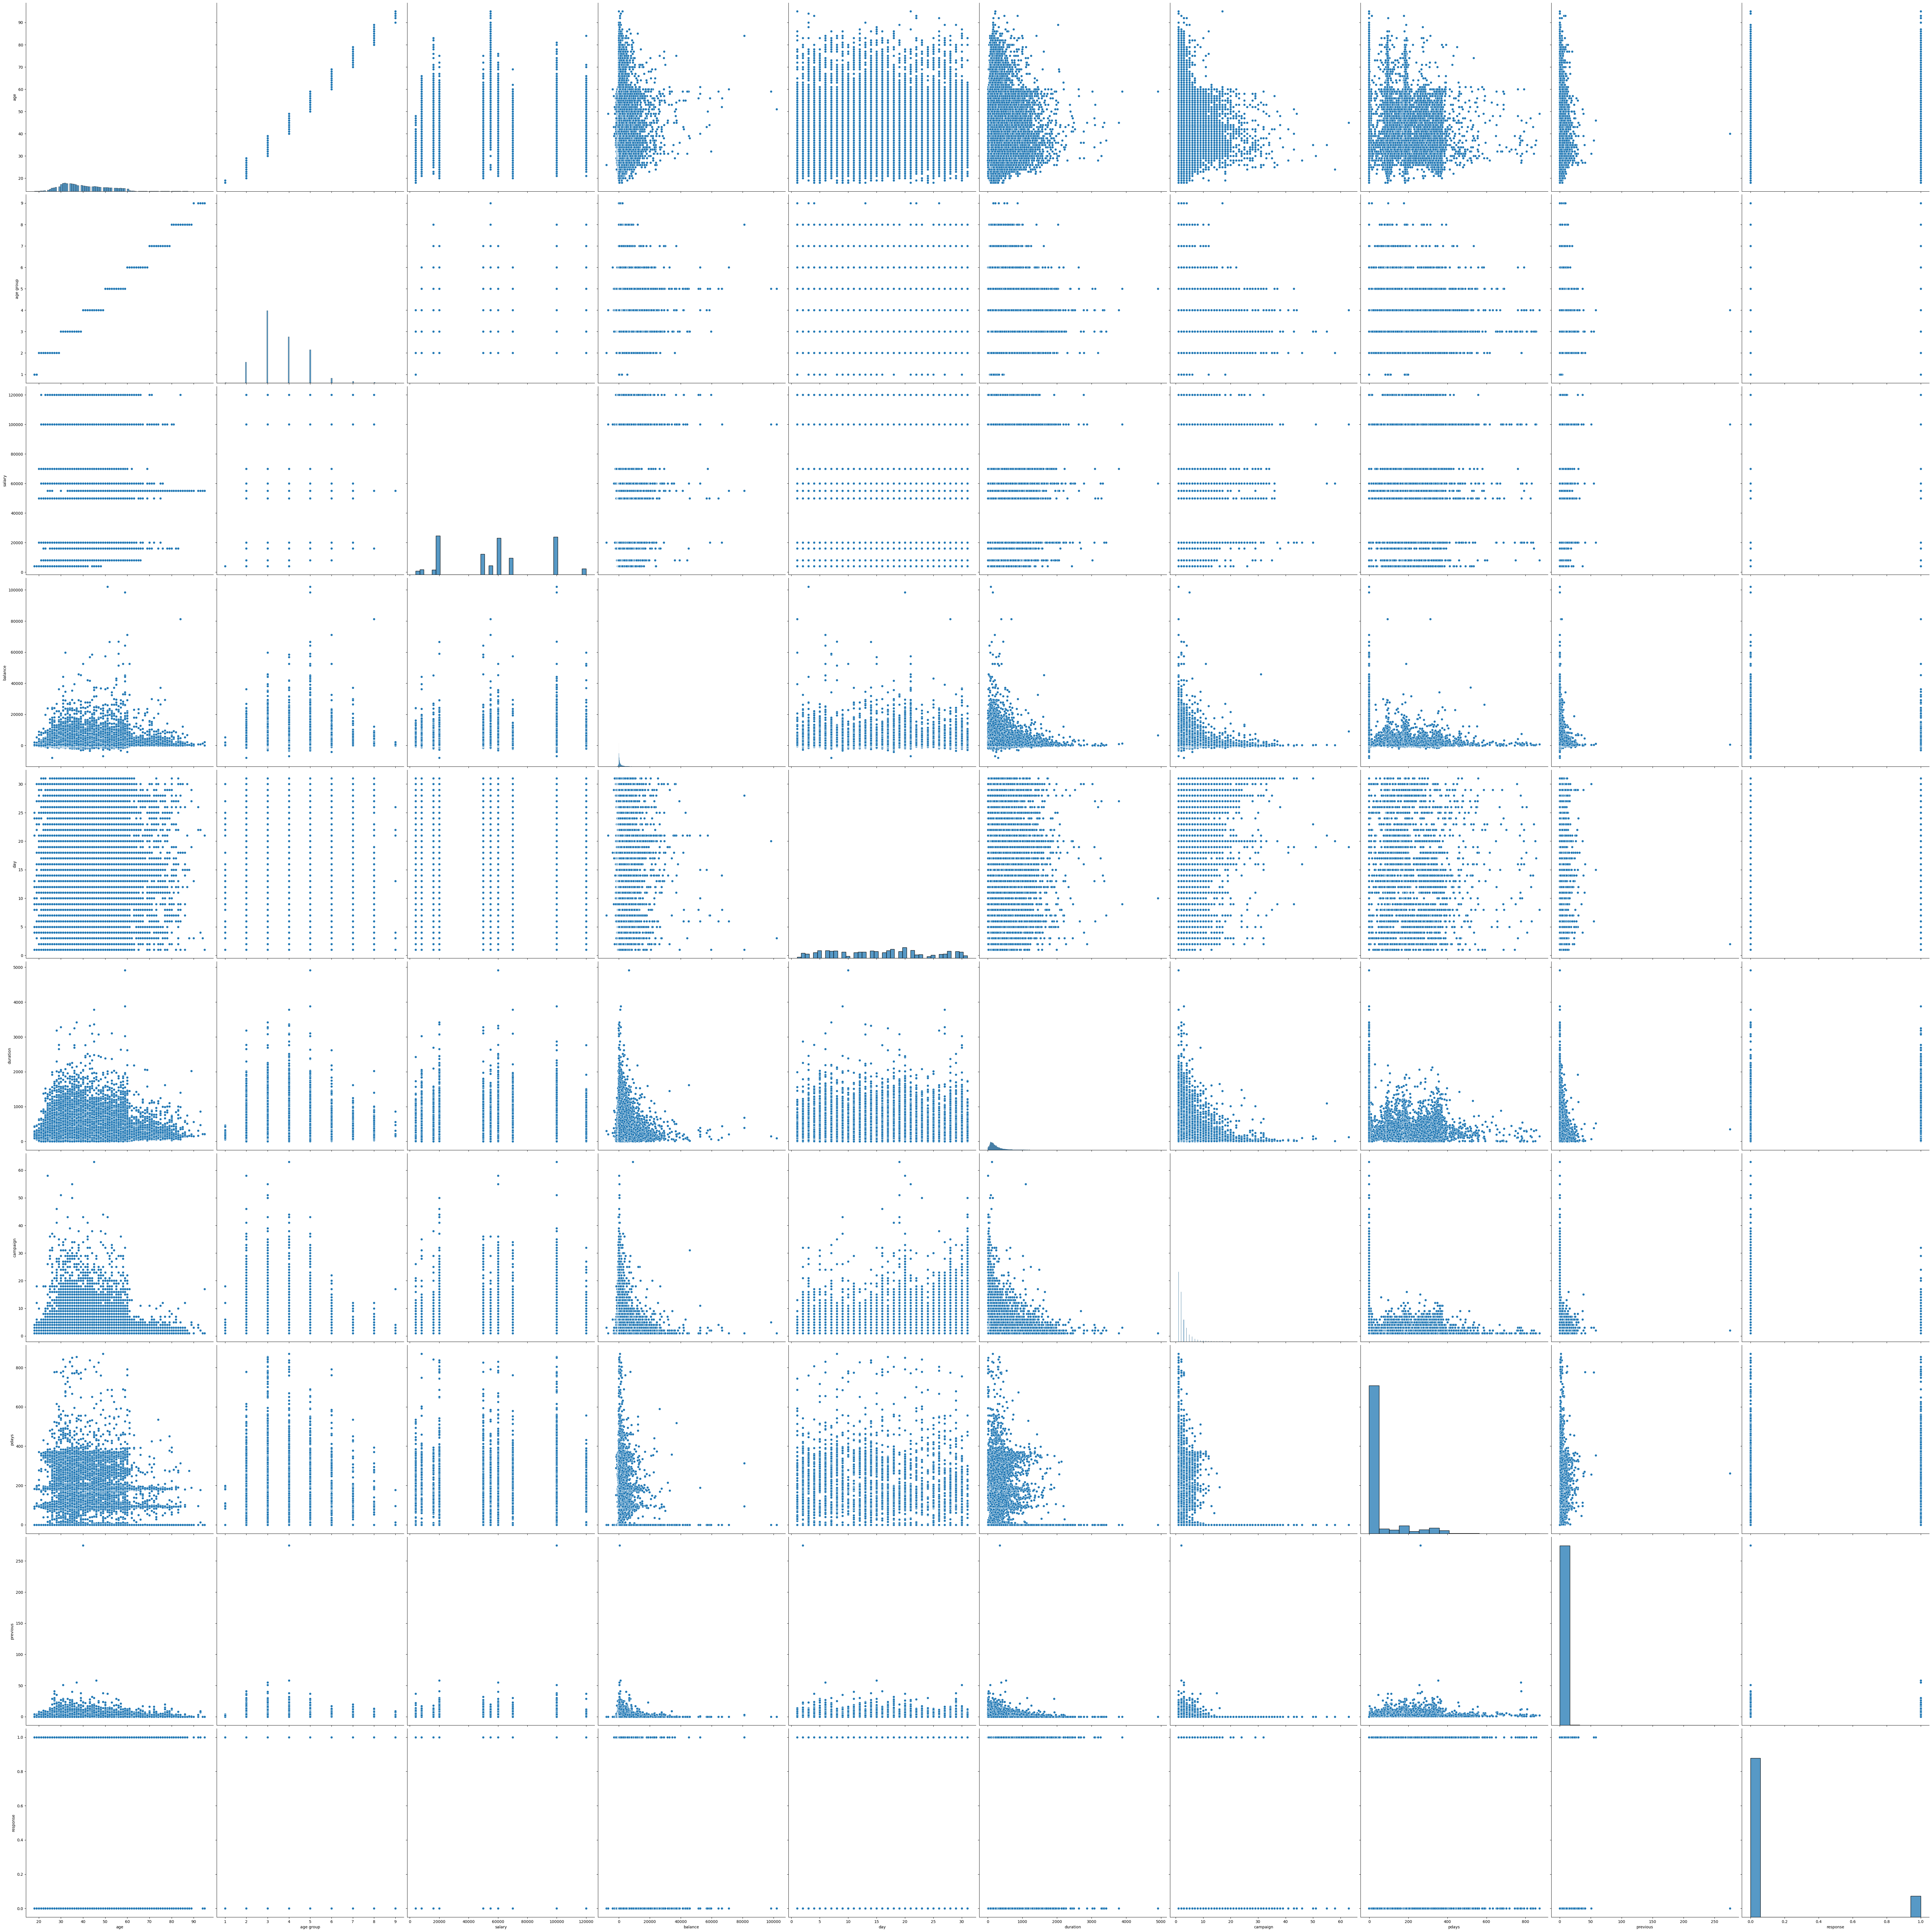

In [ ]:

sns.pairplot(data=df,height=7,aspect = 1)

## Baseline analysis of factors affecting response

Here we can see the class imbalance (This means we are going to use percentages to display)

([<matplotlib.patches.Wedge at 0x786b4d5daf50>,
 [Text(-1.5398287500880912, 0.5928131412191764, '0'),
  Text(1.5398287639638837, -0.5928131051768837, '1')],
 [Text(-0.8399065909571405, 0.3233526224831871, '88.3%'),
  Text(0.8399065985257546, -0.32335260282375466, '11.7%')])

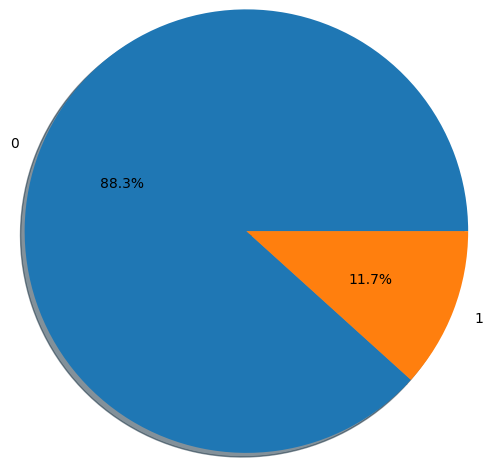

In [ ]:
times_of_day_counts = df['response'].value_counts()
plt.pie(x=times_of_day_counts, labels=times_of_day_counts.index, autopct='%1.1f%%', shadow=True, radius=1.5)

([<matplotlib.patches.Wedge at 0x786b4f1b9fc0>,
 [Text(-0.07722497577787643, 1.6481918283731742, 'secondary'),
  Text(-0.6859211774808194, -1.500670562876252, 'tertiary'),
  Text(1.4669228914214538, -0.7554053419348595, 'primary')],
 [Text(-0.042122714060659865, 0.8990137245671858, '51.5%'),
  Text(-0.37413882408044685, -0.8185475797506827, '33.4%'),
  Text(0.8001397589571565, -0.41203927741901425, '15.1%')])

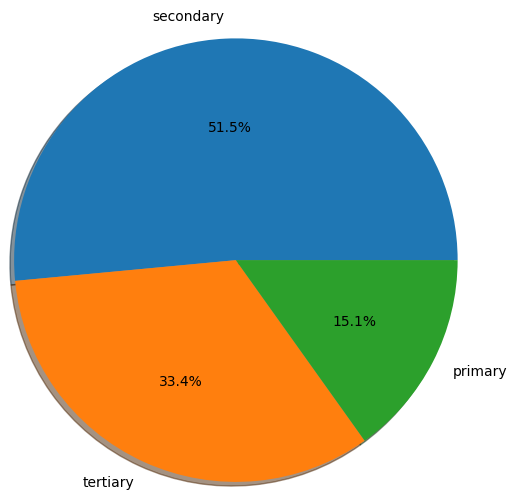

In [ ]:
inf = df['education'].value_counts()

plt.pie(x=inf.values,labels=inf.index,autopct='%1.1f%%', shadow=True,radius=1.5)

In [ ]:
def disp_perc_bar(df, x, h, size=(12, 8)):
    df1 = df.groupby(x)[h].value_counts().reset_index(name='counts')
    df2 = df.groupby(x)[h].count().reset_index(name='total_counts')

    tot_df = df1.merge(df2, on=x)

    tot_df['percentage'] = (tot_df['counts'] / tot_df['total_counts']) * 100

    plt.figure(figsize=size)
    bar_plot = sns.barplot(data=tot_df, x=x, y='percentage', hue=h)
    plt.ylabel('Percentage')
    plt.xlabel(x)
    plt.xticks(rotation=45)
    plt.legend(title=h)
    plt.title(f'Response Percentages by {x}')


    for p in bar_plot.patches:
        height = p.get_height()

        plt.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:1.1f}%'.format(height), ha='center')

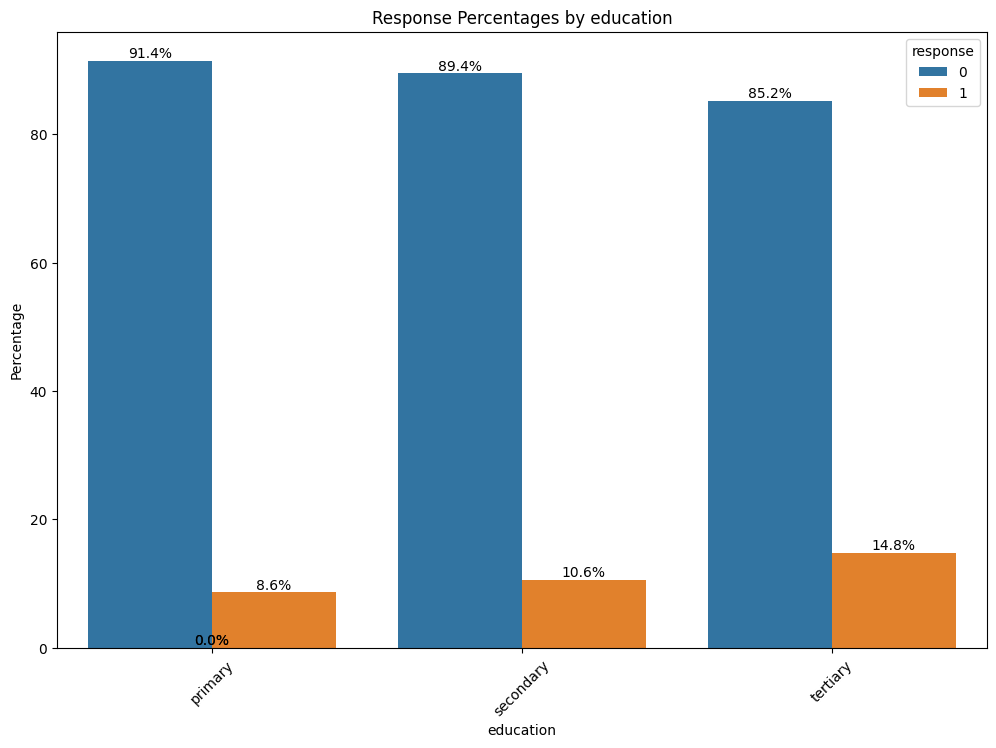

In [ ]:
disp_perc_bar(df,'education','response')

In [49]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['education'], df['response'])
print(contingency_table)


chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")
if p < 0.05:
    print('Statistical significance - Exists!')
else:
    print('Statistical significance - Not Exists')


response       0     1
education             
primary     6212   588
secondary  20690  2441
tertiary   12766  2226
Chi-Square Statistic: 234.64566083714607, P-value: 1.115172748301167e-51
Statistical significance - Exists!


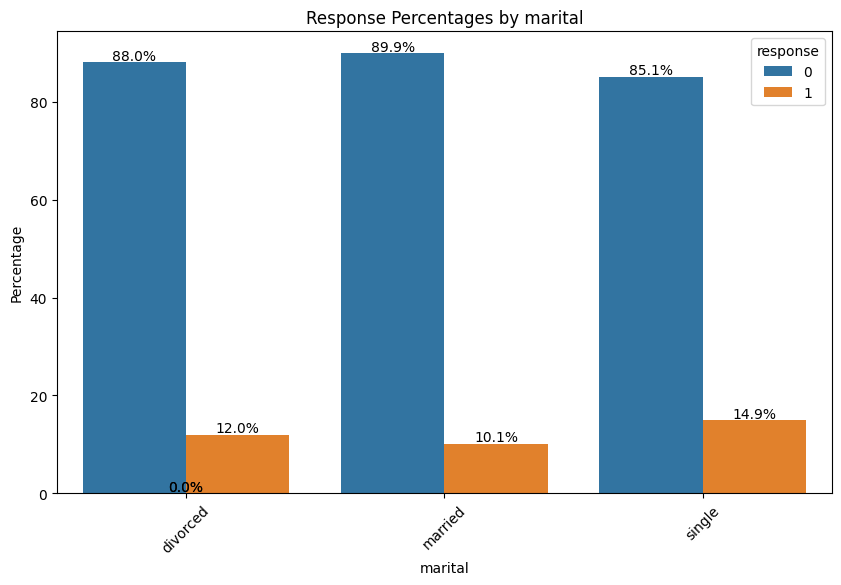

In [ ]:
disp_perc_bar(df,'marital','response',(10,6))

In [64]:


contingency_table = pd.crosstab(df['marital'], df['response'])
print(contingency_table)


chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")
if p < 0.05:
    print('Statistical significance - Exists!')
else:
    print('Statistical significance - Not Exists')


response      0     1
marital              
divorced   4569   621
married   24277  2734
single    10822  1900
Chi-Square Statistic: 194.35802308049566, P-value: 6.247288055715491e-43
Statistical significance - Exists!


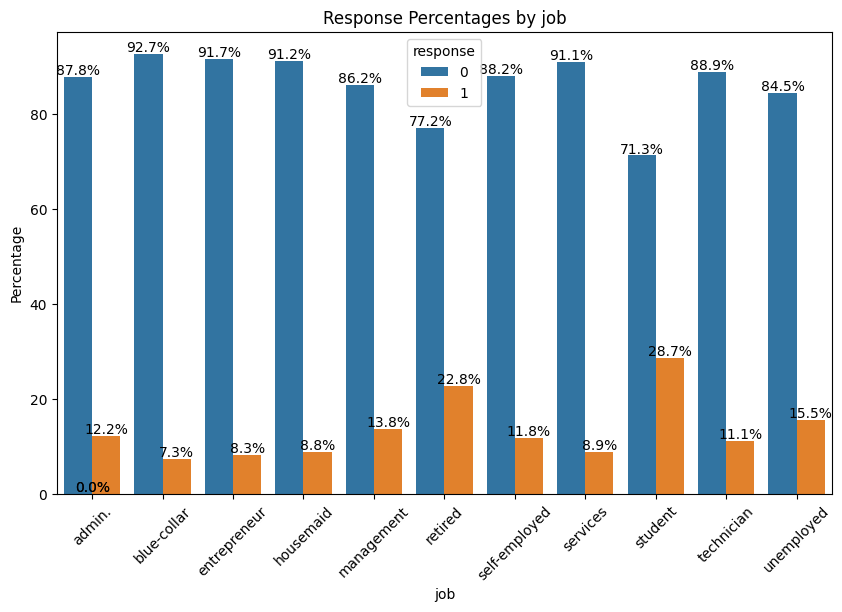

In [ ]:
disp_perc_bar(df,'job','response',(10,6))

In [ ]:
df.groupby('job')['response'].value_counts()

job            response
admin.         0           4540
               1            631
blue-collar    0           9024
               1            708
entrepreneur   0           1364
               1            123
housemaid      0           1131
               1            109
management     0           8157
               1           1301
retired        0           1748
               1            516
self-employed  0           1392
               1            187
services       0           3785
               1            369
student        0            669
               1            269
technician     0           6757
               1            840
unemployed     0           1101
               1            202
Name: response, dtype: int64

In [ ]:
df.groupby('job')['response'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
Name: response, dtype: int64

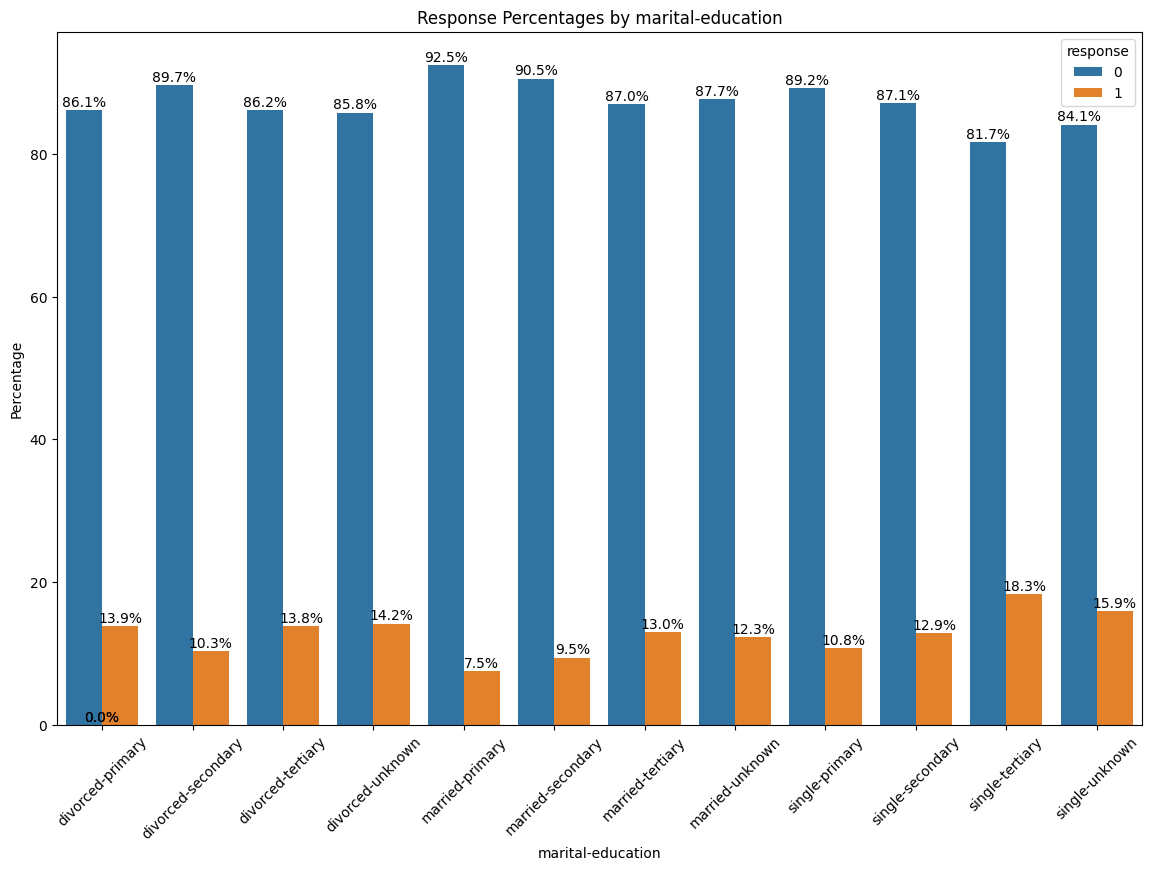

In [ ]:
disp_perc_bar(df,'marital-education','response',(14,9))

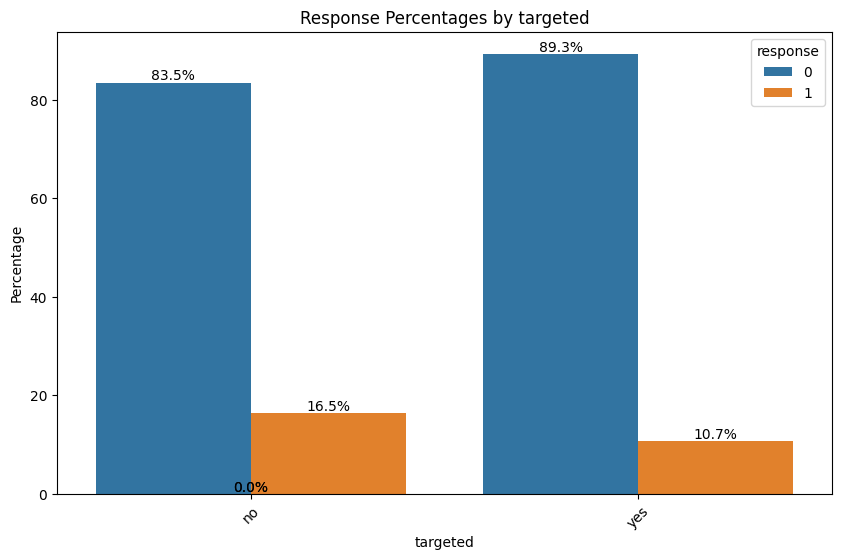

In [ ]:
disp_perc_bar(df,'targeted','response',(10,6))

In [ ]:
df.groupby('targeted')['response'].value_counts()

targeted  response
no        0            6665
          1            1314
yes       0           33003
          1            3941
Name: response, dtype: int64

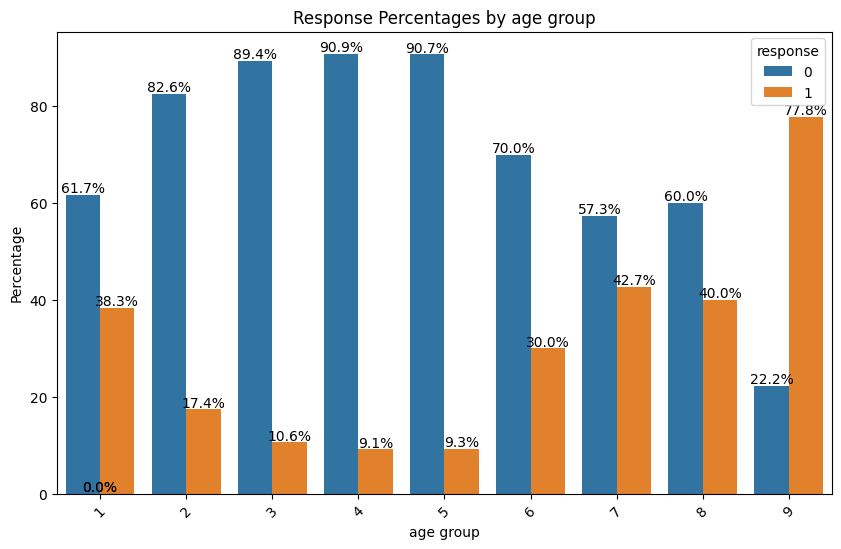

In [ ]:
disp_perc_bar(df,'age group','response',(10,6))

In [ ]:
df.groupby('age group')['response'].value_counts()

age group  response
1          0              29
           1              18
2          0            4304
           1             906
3          0           16130
           1            1907
4          0           10503
           1            1055
5          0            7542
           1             773
6          0             847
           1             363
7          0             239
           1             178
8          0              72
           1              48
9          1               7
           0               2
Name: response, dtype: int64

In [ ]:
df.groupby('age group')['response'].count()

age group
1       47
2     5210
3    18037
4    11558
5     8315
6     1210
7      417
8      120
9        9
Name: response, dtype: int64

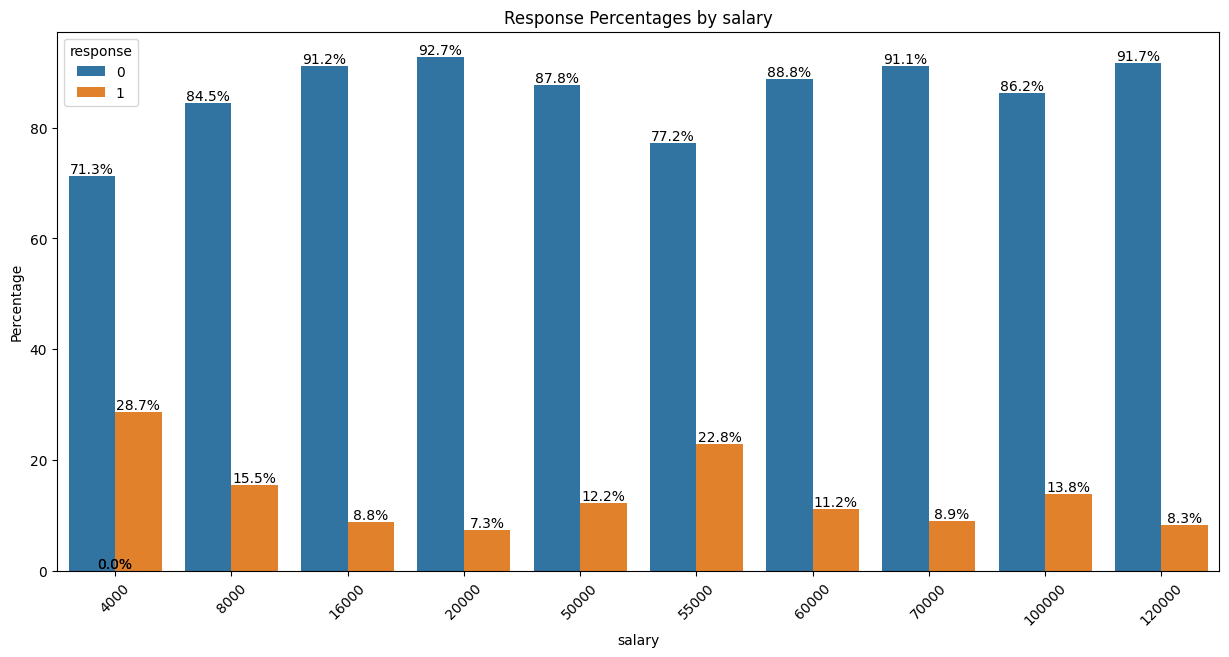

In [ ]:
disp_perc_bar(df,'salary','response',(15,7))

In [ ]:
df['salary'][df['job'] == 'retired'].mean()

55000.0

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [ ]:
df.groupby('salary')['response'].value_counts()

salary  response
4000    0            669
        1            269
8000    0           1101
        1            202
16000   0           1131
        1            109
20000   0           9024
        1            708
50000   0           4540
        1            631
55000   0           1748
        1            516
60000   0           8149
        1           1027
70000   0           3785
        1            369
100000  0           8157
        1           1301
120000  0           1364
        1            123
Name: response, dtype: int64

In [ ]:
df.groupby('salary')['response'].count()

salary
4000       938
8000      1303
16000     1240
20000     9732
50000     5171
55000     2264
60000     9176
70000     4154
100000    9458
120000    1487
Name: response, dtype: int64

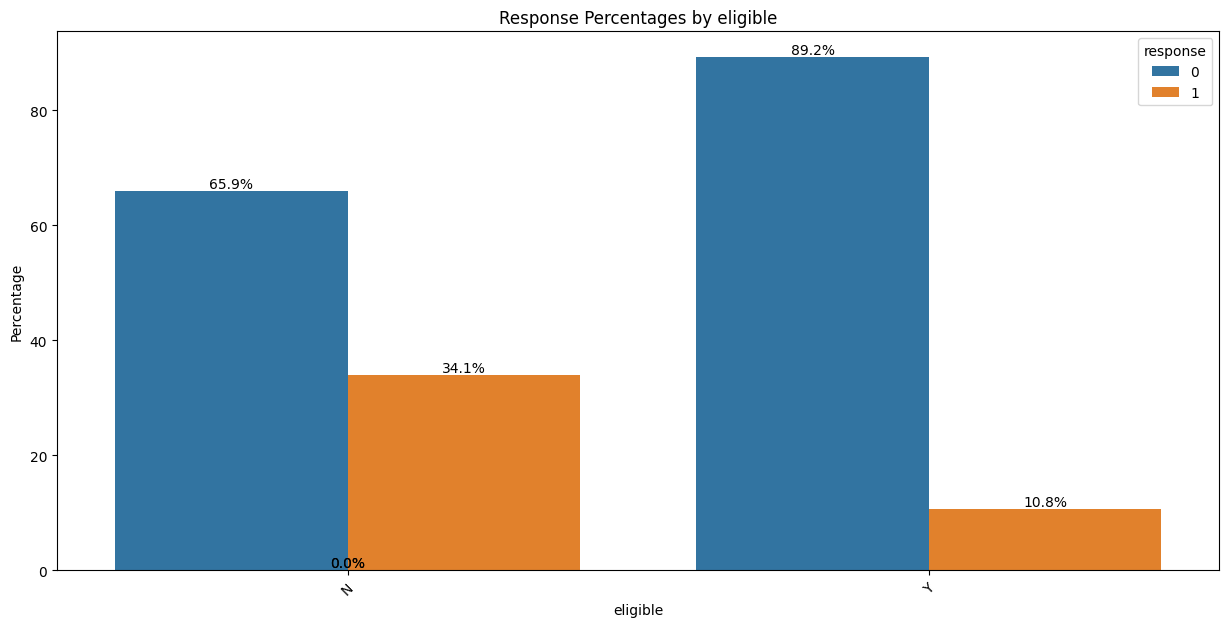

In [ ]:
disp_perc_bar(df,'eligible','response',(15,7))

In [ ]:
df.groupby('eligible')['response'].value_counts()

eligible  response
N         0            1189
          1             614
Y         0           38479
          1            4641
Name: response, dtype: int64

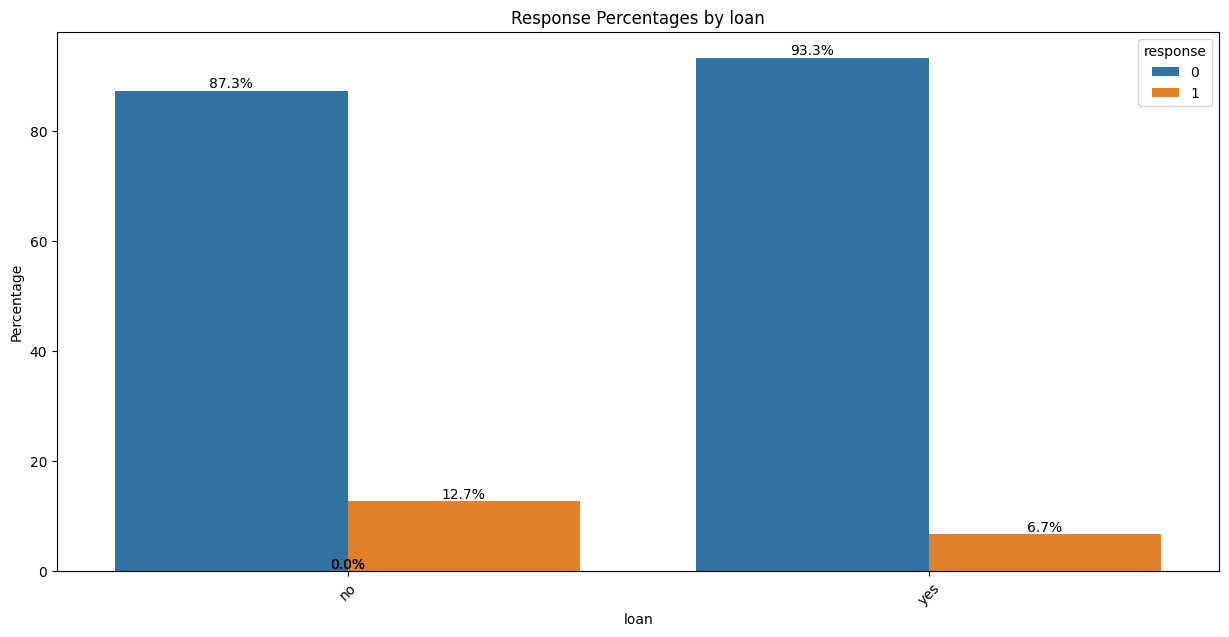

In [ ]:
disp_perc_bar(df,'loan','response',(15,7))

In [ ]:
df.groupby('loan')['response'].value_counts()

loan  response
no    0           32910
      1            4773
yes   0            6758
      1             482
Name: response, dtype: int64

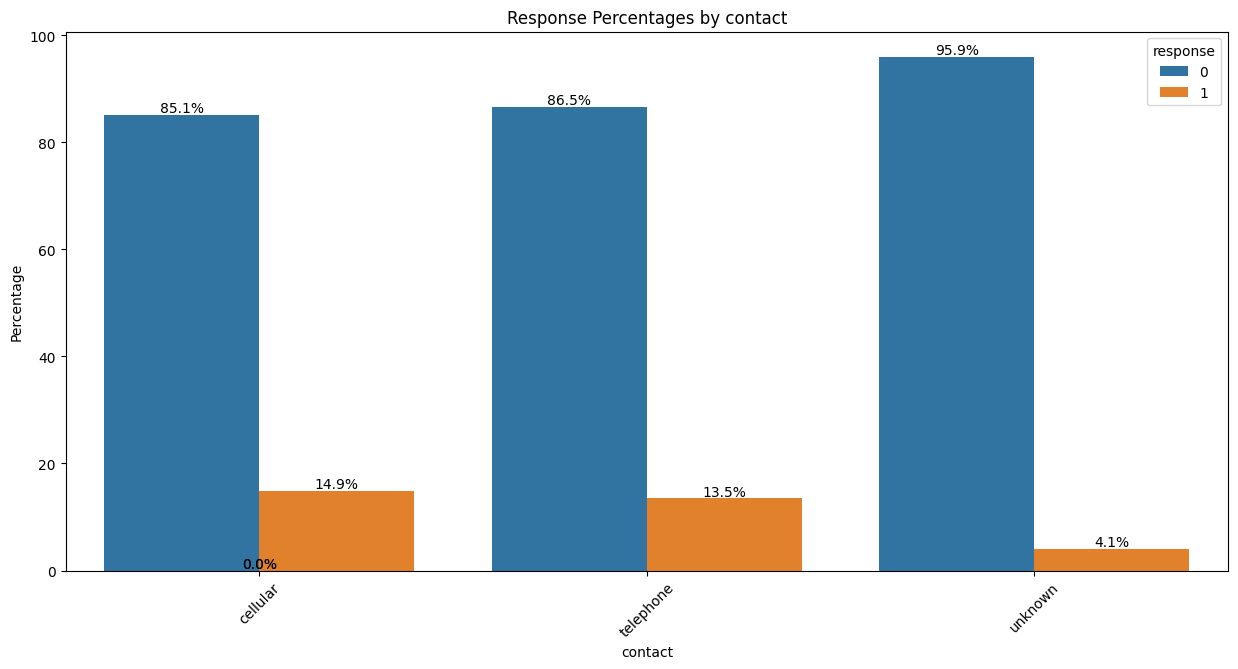

In [ ]:
disp_perc_bar(df,'contact','response',(15,7))

In [ ]:
df.groupby('contact')['response'].value_counts()

contact    response
cellular   0           24812
           1            4342
telephone  0            2475
           1             385
unknown    0           12381
           1             528
Name: response, dtype: int64

In [ ]:
len(df['duration'].unique())

1571

In [ ]:
df['duration-groups'] = pd.cut(df['duration'],  bins=[0,50,100,300,500,1000,2000,3000,4000,5000])

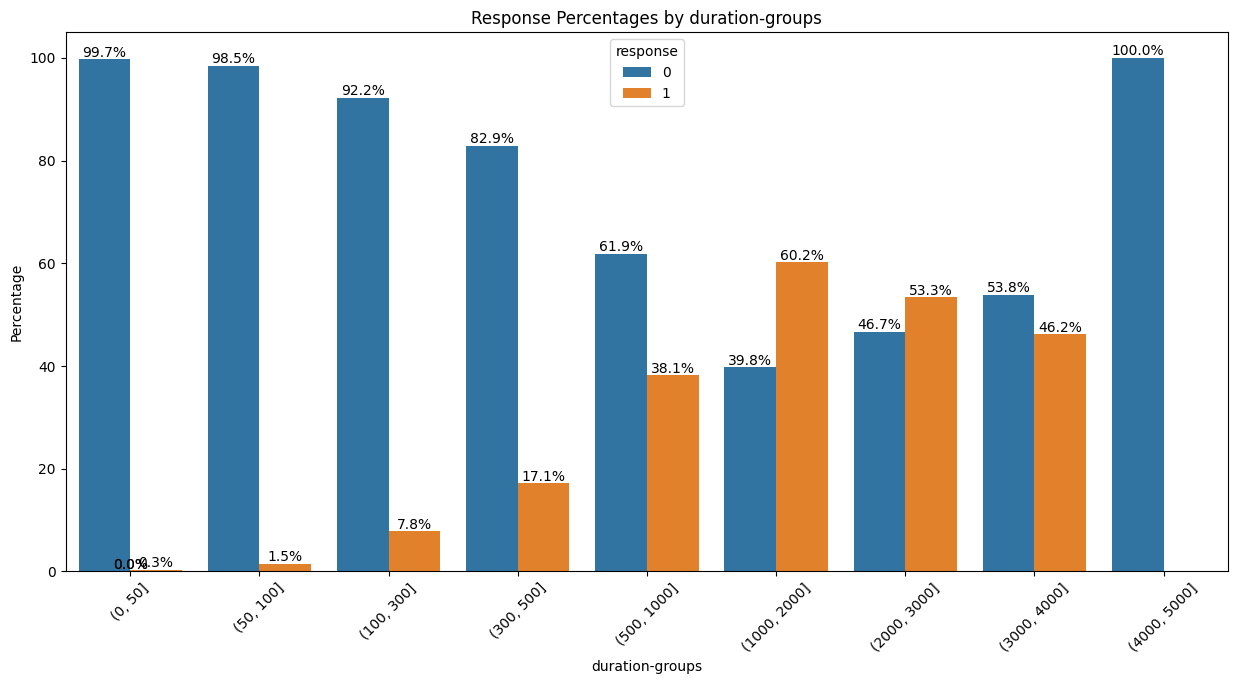

In [ ]:
disp_perc_bar(df,'duration-groups','response',(15,7))

In [ ]:
df.groupby('duration-groups')['response'].value_counts()

duration-groups  response
(0, 50]          0            3561
                 1               9
(50, 100]        0            7115
                 1             108
(100, 300]       0           20228
                 1            1700
(300, 500]       0            5684
                 1            1173
(500, 1000]      0            2652
                 1            1635
(1000, 2000]     1             600
                 0             396
(2000, 3000]     1              24
                 0              21
(3000, 4000]     0               7
                 1               6
(4000, 5000]     0               1
Name: response, dtype: int64

In [ ]:
df.groupby('duration-groups')['response'].count()

duration-groups
(0, 50]          3570
(50, 100]        7223
(100, 300]      21928
(300, 500]       6857
(500, 1000]      4287
(1000, 2000]      996
(2000, 3000]       45
(3000, 4000]       13
(4000, 5000]        1
Name: response, dtype: int64

In [ ]:
df['pdays-groups'] = pd.cut(df['pdays'],  bins=[-2,-1,100,200,300,400,500,600,700,880])

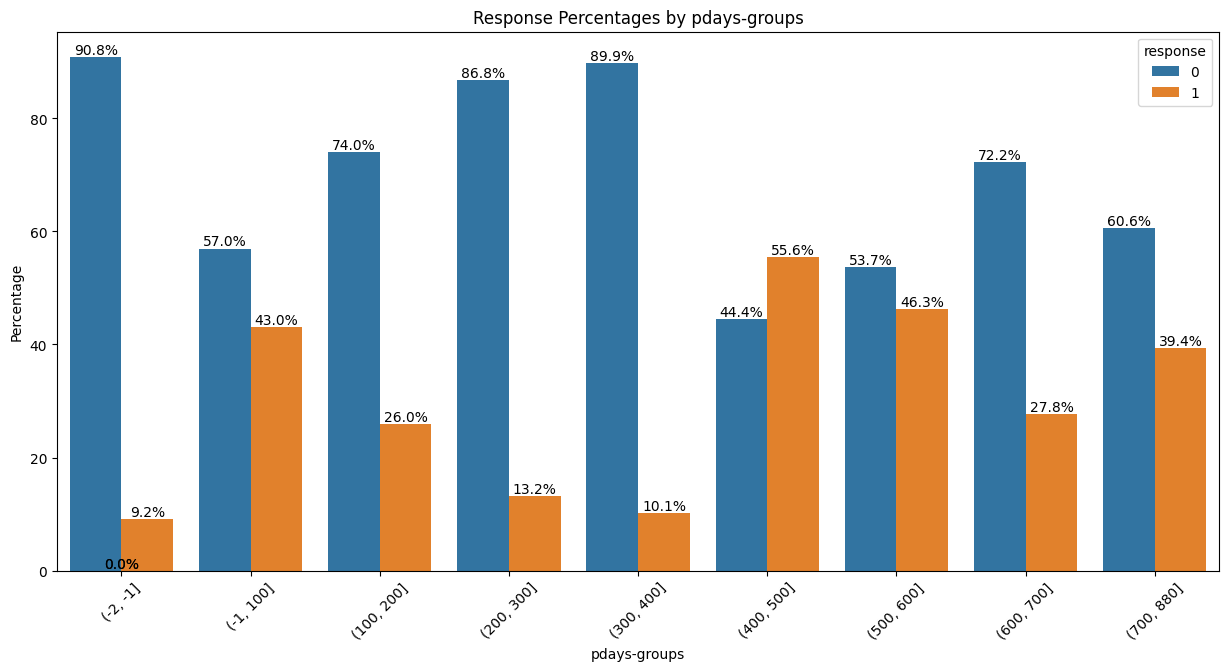

In [ ]:
disp_perc_bar(df,'pdays-groups','response',(15,7))

In [ ]:
df.groupby('pdays-groups')['response'].value_counts()

pdays-groups  response
(-2, -1]      0           33333
              1            3366
(-1, 100]     0             812
              1             613
(100, 200]    0            2111
              1             742
(200, 300]    0            1287
              1             195
(300, 400]    0            2007
              1             226
(400, 500]    1              70
              0              56
(500, 600]    0              29
              1              25
(600, 700]    0              13
              1               5
(700, 880]    0              20
              1              13
Name: response, dtype: int64

In [ ]:
df.groupby('pdays-groups')['response'].count()

pdays-groups
(-2, -1]      36699
(-1, 100]      1425
(100, 200]     2853
(200, 300]     1482
(300, 400]     2233
(400, 500]      126
(500, 600]       54
(600, 700]       18
(700, 880]       33
Name: response, dtype: int64

## Overview after EDA


After a thorough analysis of the data provided, we have identified a number of key insights that can help improve customer acquisition and retention strategies. The study covers various aspects, including age groups, educational level, professional status, marital status, income level, use of communication channels, and credit history.

### Key findings:
### Demographic characteristics:
The largest category of clients is in the age range of 30-39 years.
Customers with higher education have the highest salaries.
Representatives of blue-collar professions make up the largest share of the client base, while students make up the smallest.
Half of the client base has a second level of education.

### Client reaction:
People with a tertiary education and single marital status have a slightly higher percentage of positive responses.
Retired people and students, as well as customers in the 60-69 and 70-79 age groups, are the most likely to respond positively.
Customers with a salary of 55,000 have the second highest percentage of agreement, and those with a salary of 4,000 have the highest percentage of agreement, although this finding is based on a smaller sample size.
Credit history and communication:

Customers with no previous credit have almost twice the acceptance rate.
The use of cellular as a communication channel is associated with the highest number of positive responses.
Time of last contact:

If 0 to 100 days have passed since the last contact with the customer, the probability of receiving a positive response is highest.


# Features Selection

In [ ]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, df[i].unique())
        print('--------------')

eligible ['Y' 'N']
--------------
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
--------------
marital ['married' 'single' 'divorced']
--------------
education ['tertiary' 'secondary' 'primary']
--------------
marital-education ['married-tertiary' 'single-secondary' 'married-secondary'
 'married-unknown' 'single-tertiary' 'divorced-tertiary' 'married-primary'
 'divorced-secondary' 'single-unknown' 'single-primary' 'divorced-primary'
 'divorced-unknown']
--------------
targeted ['yes' 'no']
--------------
default ['no' 'yes']
--------------
housing ['yes' 'no']
--------------
loan ['no' 'yes']
--------------
contact ['unknown' 'cellular' 'telephone']
--------------
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------


In [ ]:
df_cp = df.copy()

hot_col = ['eligible','job','marital','marital-education','targeted','default','housing','loan','contact','month']


#df_cp.drop(drp,axis=1,inplace=True)
hot = pd.get_dummies(df_cp[hot_col])
hot = hot.astype('float64')
df_cp = df_cp.drop(hot_col,axis=1)
df_cp = df_cp.join(hot)

education_order = {}

education_order = { 'primary': 0, 'secondary': 1, 'tertiary': 2}
df_cp['education'] = df_cp['education'].map(education_order)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl_col = ['education','duration-groups','pdays-groups']

lbl_encd = LabelEncoder()

for c in lbl_col:
    df_cp[c] = lbl_encd.fit_transform(df_cp[c])

In [ ]:
df_cp.head()

age  age group  salary  education  balance  day  duration  campaign  pdays  \
0   58          5  100000          2     2143    5       261         1     -1   
1   44          4   60000          1       29    5       151         1     -1   
2   33          3  120000          1        2    5        76         1     -1   
3   47          4   20000          2     1506    5        92         1     -1   
5   35          3  100000          2      231    5       139         1     -1   

   previous  response  duration-groups  pdays-groups  eligible_N  eligible_Y  \
0         0         0                2             0         0.0         1.0   
1         0         0                2             0         0.0         1.0   
2         0         0                1             0         0.0         1.0   
3         0         0                1             0         0.0         1.0   
5         0         0                2             0         0.0         1.0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            0.0   
1         0.0              0.0               0.0            0.0   
2         0.0              0.0               1.0            0.0   
3         0.0              1.0               0.0            0.0   
5         0.0              0.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             1.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           0.0          0.0   
2             0.0          0.0                0.0           0.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
5             1.0          0.0                0.0           0.0          0.0   

   job_technician  job_unemployed  marital_divorced  marital_married  \
0             0.0             0.0               0.0              1.0   
1             1.0             0.0               0.0              0.0   
2             0.0             0.0               0.0              1.0   
3             0.0             0.0               0.0              1.0   
5             0.0             0.0               0.0              1.0   

   marital_single  marital-education_divorced-primary  \
0             0.0                                 0.0   
1             1.0                                 0.0   
2             0.0                                 0.0   
3             0.0                                 0.0   
5             0.0                                 0.0   

   marital-education_divorced-secondary  marital-education_divorced-tertiary  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   0.0                                  0.0   
5                                   0.0                                  0.0   

   marital-education_divorced-unknown  marital-education_married-primary  \
0                                 0.0                                0.0   
1                                 0.0                                0.0   
2                                 0.0                                0.0   
3                                 0.0                                0.0   
5                                 0.0                                0.0   

   marital-education_married-secondary  marital-education_married-tertiary  \
0                                  0.0                                 1.0   
1                                  0.0                                 0.0   
2                                  1.0                                 0.0   
3                                  0.0                                 0.0   
5                                  0.0         

In [ ]:
y = df_cp['response']


df_cp.drop('response',inplace=True,axis=1)

X = df_cp

Feature: 50, Score: 0.11250
Feature: 58, Score: 0.07450
Feature: 44, Score: 0.07244
Feature: 6, Score: 0.05287
Feature: 12, Score: 0.04551
Feature: 57, Score: 0.03892
Feature: 62, Score: 0.03807
Feature: 61, Score: 0.03805
Feature: 53, Score: 0.02754
Feature: 46, Score: 0.02751
Feature: 60, Score: 0.02734
Feature: 51, Score: 0.02679
Feature: 8, Score: 0.02518
Feature: 54, Score: 0.02092
Feature: 55, Score: 0.02058
Feature: 52, Score: 0.01726
Feature: 59, Score: 0.01704
Feature: 15, Score: 0.01623
Feature: 48, Score: 0.01397
Feature: 56, Score: 0.01301
Feature: 9, Score: 0.01286
Feature: 5, Score: 0.01255
Feature: 38, Score: 0.01240
Feature: 32, Score: 0.01222
Feature: 49, Score: 0.01096
Feature: 0, Score: 0.01068
Feature: 7, Score: 0.01049
Feature: 26, Score: 0.00993
Feature: 30, Score: 0.00859
Feature: 3, Score: 0.00854
Feature: 42, Score: 0.00846
Feature: 23, Score: 0.00826
Feature: 37, Score: 0.00792
Feature: 14, Score: 0.00789
Feature: 17, Score: 0.00781
Feature: 27, Score: 0.00777

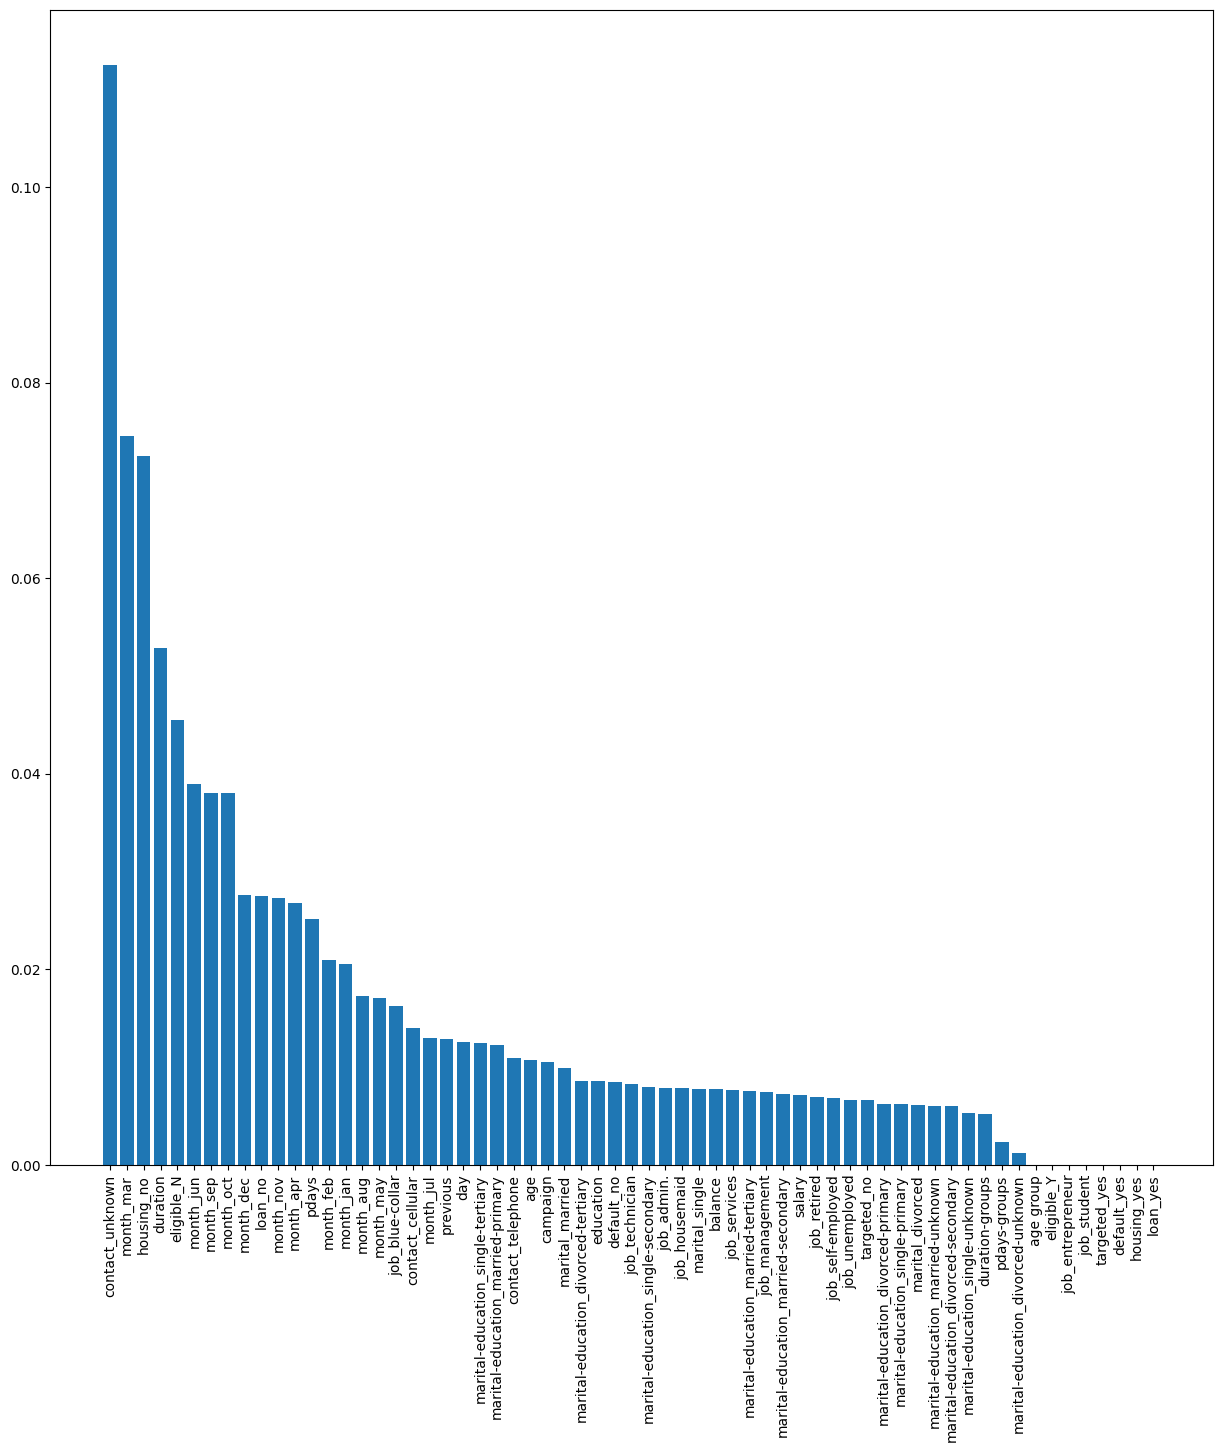

In [ ]:
from xgboost import XGBClassifier


model = XGBClassifier()

model.fit(X, y)

importance = model.feature_importances_

features_importances = [(i, v) for i, v in enumerate(importance)]

features_importances.sort(key=lambda x: x[1], reverse=True)


for i, v in features_importances:
    print('Feature: %d, Score: %.5f' % (i,v))


plt.figure(figsize=(15,15))

sorted_features = [X.columns[i] for i, _ in features_importances]
sorted_importance = [v for _, v in features_importances]
plt.bar(sorted_features, sorted_importance)
plt.xticks(rotation=90)

plt.show()

In [ ]:
from sklearn.feature_selection import RFE


n_features_to_select = 33
rfe = RFE(model, n_features_to_select=n_features_to_select)
rfe.fit(X, y)


from operator import itemgetter
features = X.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 age
1 education
1 balance
1 day
1 duration
1 campaign
1 pdays
1 previous
1 eligible_N
1 job_blue-collar
1 job_technician
1 marital_married
1 marital-education_married-primary
1 marital-education_married-tertiary
1 marital-education_married-unknown
1 marital-education_single-secondary
1 marital-education_single-tertiary
1 housing_no
1 loan_no
1 contact_cellular
1 contact_unknown
1 month_apr
1 month_aug
1 month_dec
1 month_feb
1 month_jan
1 month_jul
1 month_jun
1 month_mar
1 month_may
1 month_nov
1 month_oct
1 month_sep
2 default_no
3 job_housemaid
4 targeted_no
5 salary
6 job_management
7 job_services
8 marital_single
9 marital-education_single-primary
10 duration-groups
11 contact_telephone
12 marital-education_divorced-primary
13 job_admin.
14 marital_divorced
15 marital-education_divorced-secondary
16 job_self-employed
17 marital-education_married-secondary
18 job_unemployed
19 marital-education_divorced-tertiary
20 job_retired
21 marital-education_single-unknown
22 pdays-groups
2

# Final Feauture Encoding,Handling imbalanced classes

In [ ]:
drp = ['marital-education','age group','duration-groups', 'pdays-groups']
df_cp = df.copy()
df_cp.drop(drp,axis=1,inplace=True)

In [ ]:
num_var=df_cp.select_dtypes(include=np.number).columns.to_list()

In [ ]:
df_md = df_cp.copy()
hot_col = ['eligible','job','marital','targeted','default','housing','loan','contact','month']


hot = pd.get_dummies(df_md[hot_col])
hot = hot.astype('float64')
df_md = df_md.drop(hot_col,axis=1)
df_md = df_md.join(hot)

education_order = {}

education_order = { 'primary': 0, 'secondary': 1, 'tertiary': 2}
df_md['education'] = df_md['education'].map(education_order)


from sklearn.preprocessing import LabelEncoder

lbl_col = ['education']

lbl_encd = LabelEncoder()

for c in lbl_col:
    df_md[c] = lbl_encd.fit_transform(df_md[c])

In [ ]:
df_md = df_md[df_md['age'] < 70]

In [ ]:
y = df_md['response']
df_md.drop('response',inplace=True,axis = 1)

X = df_md

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=7)
X, y  = adasyn.fit_resample(X, y)


# Model training and evaluation

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(62720, 48)
(62720,)
(15680, 48)
(15680,)


In [ ]:
'''
classifier = XGBClassifier(n_estimators  = 500,
                          max_depth = 20,
                           learning_rate = 1,
                           )



param_grid = {#"max_depth": [5,10,20],
              #"n_estimators": [100,500,1000,2000],
              #'min_child_weight': [1, 3, 5, 7],
              #"reg_alpha": [0.03,0.05,0.07],
              #"reg_lambda": [0,5,15],
              #'colsample_bytree': [0,0.3,0.6,0.7, 0.9,1.0]

              }


search = GridSearchCV(classifier, param_grid, cv=5,n_jobs=-1).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)
'''

'\nclassifier = XGBClassifier(n_estimators  = 500,\n                          max_depth = 20,\n                           learning_rate = 1,\n                           )\n\n\n\nparam_grid = {#"max_depth": [5,10,20],\n              #"n_estimators": [100,500,1000,2000],\n              #\'min_child_weight\': [1, 3, 5, 7],\n              #"reg_alpha": [0.03,0.05,0.07],\n              #"reg_lambda": [0,5,15],\n              #\'colsample_bytree\': [0,0.3,0.6,0.7, 0.9,1.0]\n\n              }\n\n\nsearch = GridSearchCV(classifier, param_grid, cv=5,n_jobs=-1).fit(X_train, y_train)\nprint("The best hyperparameters are ",search.best_params_)\n'

In [ ]:
from xgboost import XGBClassifier


classifier = XGBClassifier(
                          #learning_rate = search.best_params_["learning_rate"],
                          #n_estimators  = search.best_params_["n_estimators"],
                           #max_depth  = search.best_params_["max_depth"],
                           #reg_alpha =  search.best_params_["reg_alpha"],
                           #reg_lambda =  search.best_params_["reg_lambda"],
                          #colsample_bytree =  search.best_params_["colsample_bytree"],

                          #MANUAL:

                          n_estimators  = 500,
                          max_depth = 20,
                          learning_rate = 0.1,
                          random_state = 42,
                          #reg_alpha =  0.05,
                          #reg_lambda = 15 ,
                          #subsample = 0.7,
                           #eval_metric='rmse'
                              )

classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
threshold = 0.45548326

y_pred1 = (y_pred_proba >= threshold).astype(int)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def clf_eval(y_test, y_pred, y_proba=None):

    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)

    f1 = f1_score(y_test, y_pred, average='binary')

    print("Accuracy: {:.3f}".format(accuracy))
    for i, (p, r) in enumerate(zip(precision, recall)):
        print(f"Class {i}: Precision = {p}, Recall = {r}")

    print("F1-Score: {:.2f}".format(f1))

    if y_proba is not None:
        # Обчислення ROC-AUC може вимагати додаткових дій для багатокласової класифікації
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        print("ROC-AUC: {:.2f}".format(roc_auc))


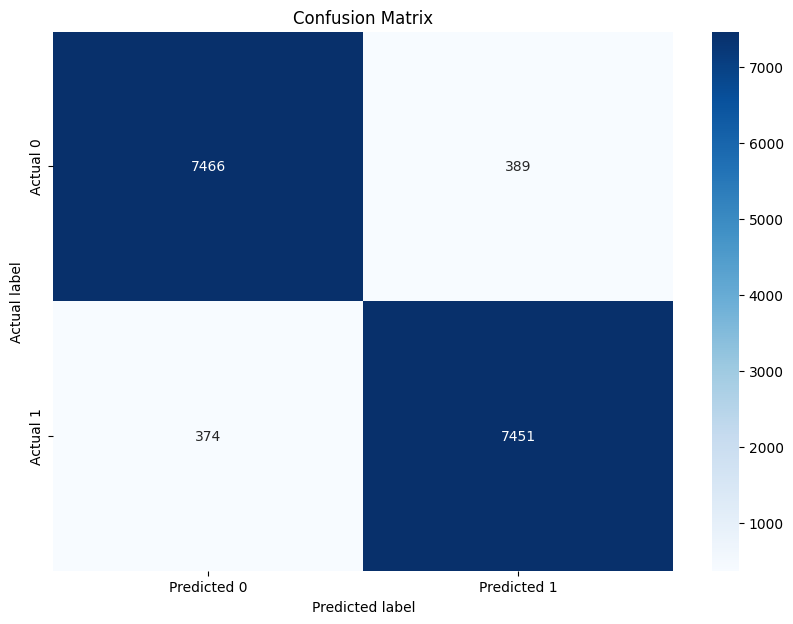

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
cm = confusion_matrix(y_test, y_pred1, labels=[0, 1])



plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

If it is important to us not to lose some customers (which we can potentially lose) who can bring us money (But at the same time, we are more indifferent to spending resources on inquiries from those customers whose answer will be no (although we anticipate that the answer will be yes ) then we can set the threshold parameter: 0.3)

If the balance is important to us, the threshold value should be: 0.45548326

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


xgb_probs = classifier.predict_proba(X_test)
xgb_probs = xgb_probs[:,1]

xgb_auc = round(roc_auc_score(y_test, xgb_probs),3)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
print(f'XGB: AUC for ROC = {xgb_auc}')


XGB: AUC for ROC = 0.992


In [ ]:
J = np.argmax(xgb_tpr - xgb_fpr)

In [ ]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
J = tpr - fpr


optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]


In [ ]:
optimal_threshold

0.45548326

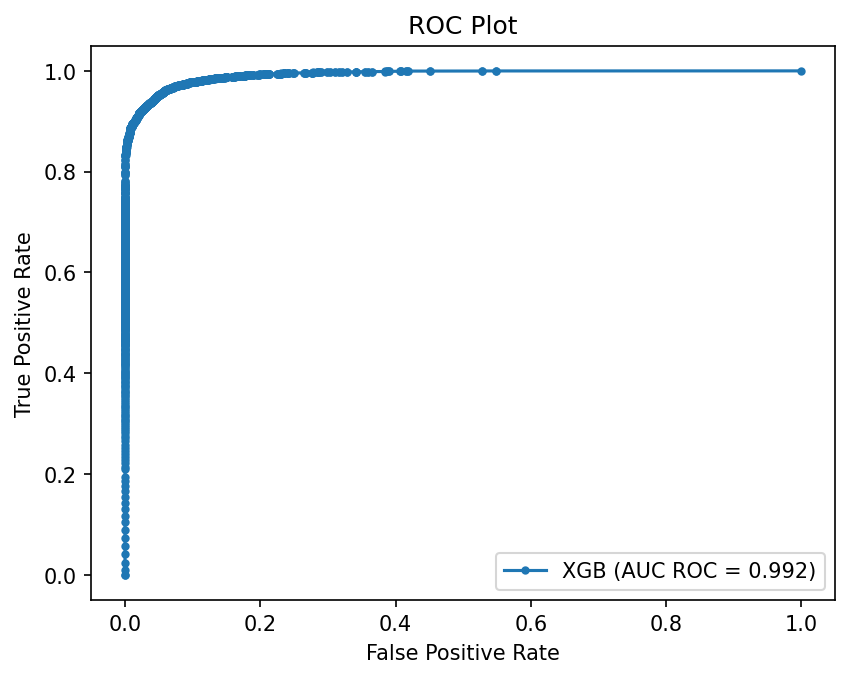

In [ ]:
plt.figure(dpi =150)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label=f'XGB (AUC ROC = {xgb_auc})')


plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

We try to reduce false positives because our business objective is to find customers who will buy our product so we don't lose potential profit.

In [ ]:
clf_eval(y_test, y_pred1)

Accuracy: 0.951
Class 0: Precision = 0.952295918367347, Recall = 0.9504774029280713
Class 1: Precision = 0.9503826530612245, Recall = 0.9522044728434504
F1-Score: 0.95
